# Credit EDA Assignment

### Risk analytics in banking and financial services

In [1]:
# Importing all the necessary libraries and warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

data = pd.read_csv("application_data.csv")

In [3]:
# Finding the shape of the dataset

data.shape

(307511, 122)

In [4]:
# looking for the missing data and finding the number of columsn with null values more than 30 percent

nullcol = data.isnull().sum()
nullcol = nullcol[nullcol.values>(0.3*len(nullcol))]
len(nullcol)

64

In [5]:
# Removing the 64 columns

nullcol = list(nullcol[nullcol.values >= 0.3].index)
data.drop(labels = nullcol,axis = 1,inplace = True)
data.shape

(307511, 58)

In [6]:
# Checking the columns having null values less than 30 percentRisk analytics in banking and financial services

data.isnull().sum()/len(data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


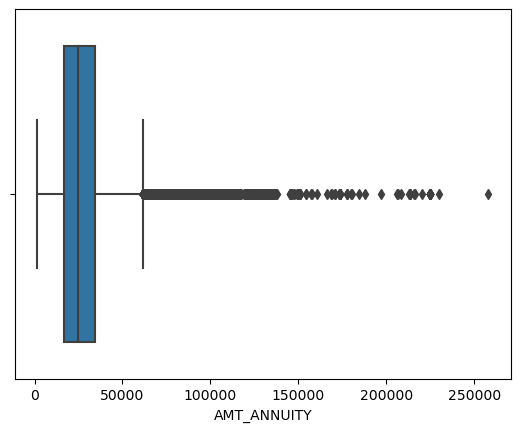

In [7]:
# looking for outliers in the columns with null values
sns.boxplot(data.AMT_ANNUITY)
plt.show()


**AMT_ANNUITY** has missing values. We can Impute the values.
- For **AMT_ANNUITY** we can use Median, because of huge outlier we cannot use Mean


In [8]:
# Filling missing values with median

md = data['AMT_ANNUITY'].median()

data.loc[data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = md

In [9]:
# Searching for the column for null values

data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [10]:
# Removing rows having null values greater than or equal to 30%

nullrow = data.isnull().sum(axis = 1)
nullrow = list(nullrow[nullrow.values >= 0.3*len(data)].index)
data.drop(labels = nullrow,axis = 0,inplace = True)
print(len(nullrow))

0


In [11]:
# We'll remove unwanted columns from the data

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

data.drop(labels=unwanted,axis=1,inplace=True)

In [12]:
# There are XNA values in some categorical columns let's find them.

# For Gender column

data[data['CODE_GENDER']=='XNA'].shape

(4, 28)

In [13]:
# For Organization column

data[data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [14]:
# Describing the Gender column to check the number of females and males

data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**'F'** here has more value count than the **'M'** so, converting the XNA into **'F'**

In [15]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

data.loc[data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [16]:
# Describing the ORGANIZATION_TYPE column

data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [17]:
# Dropping the rows, a total of 55374 having 'XNA' values in the ORGANIZATION_TYPE column

data = data.drop(data.loc[data['ORGANIZATION_TYPE'] == 'XNA'].index)

data[data['ORGANIZATION_TYPE'] == 'XNA'].shape


(0, 28)

In [18]:
# Casting all variable into numeric in the dataset

numeric = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

data[numeric] = data[numeric].apply(pd.to_numeric)
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [19]:
# Binning income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [20]:
# Binning Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

In [21]:
# Dividing the dataset into two dataset of  target=1 (clients with payment difficulties) and target=0 (other)

target0_data = data.loc[data["TARGET"] == 0]
target1_data = data.loc[data["TARGET"] == 1]

In [22]:
# Calculating Imbalance percentage Since the majority is target0 and minority is target1

round(len(target0_data)/len(target1_data),2)

10.55

In [23]:
# plotting in logarithmic scale

def uniplot(data,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = data, x = col, order = data[col].value_counts().index, hue = hue, palette = 'viridis') 
        
    plt.show()

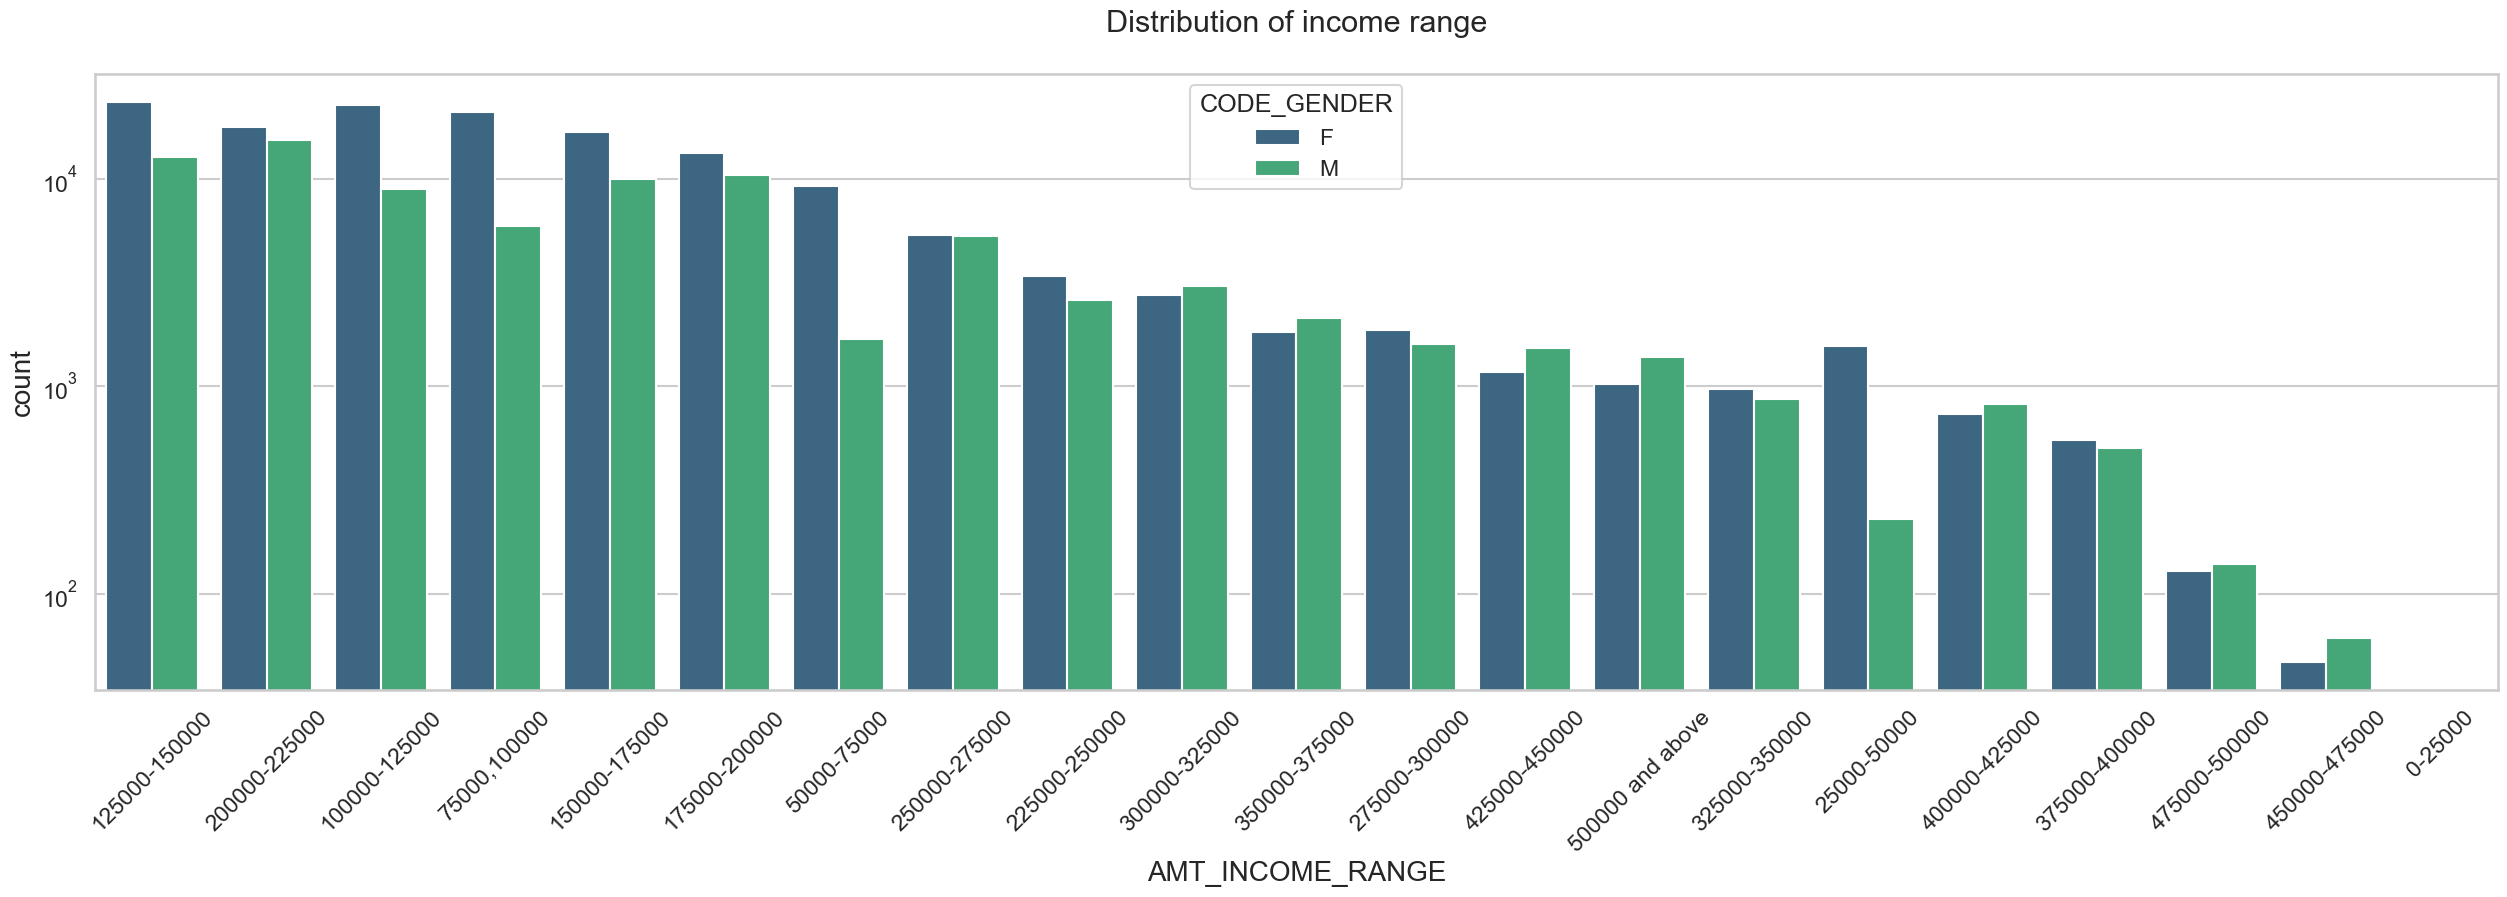

In [24]:
# PLotting for income range

uniplot(target0_data, col = 'AMT_INCOME_RANGE', title = 'Distribution of income range', hue = 'CODE_GENDER')

**Conclusions to be drawn from the graph above**
- Male numbers are lower than female counts.
- The income level between 100,000 and 200,000 has the most credits.
- This graph demonstrates that more women than men have credits in that range.
- The income level of 400000 and above has a very low count.

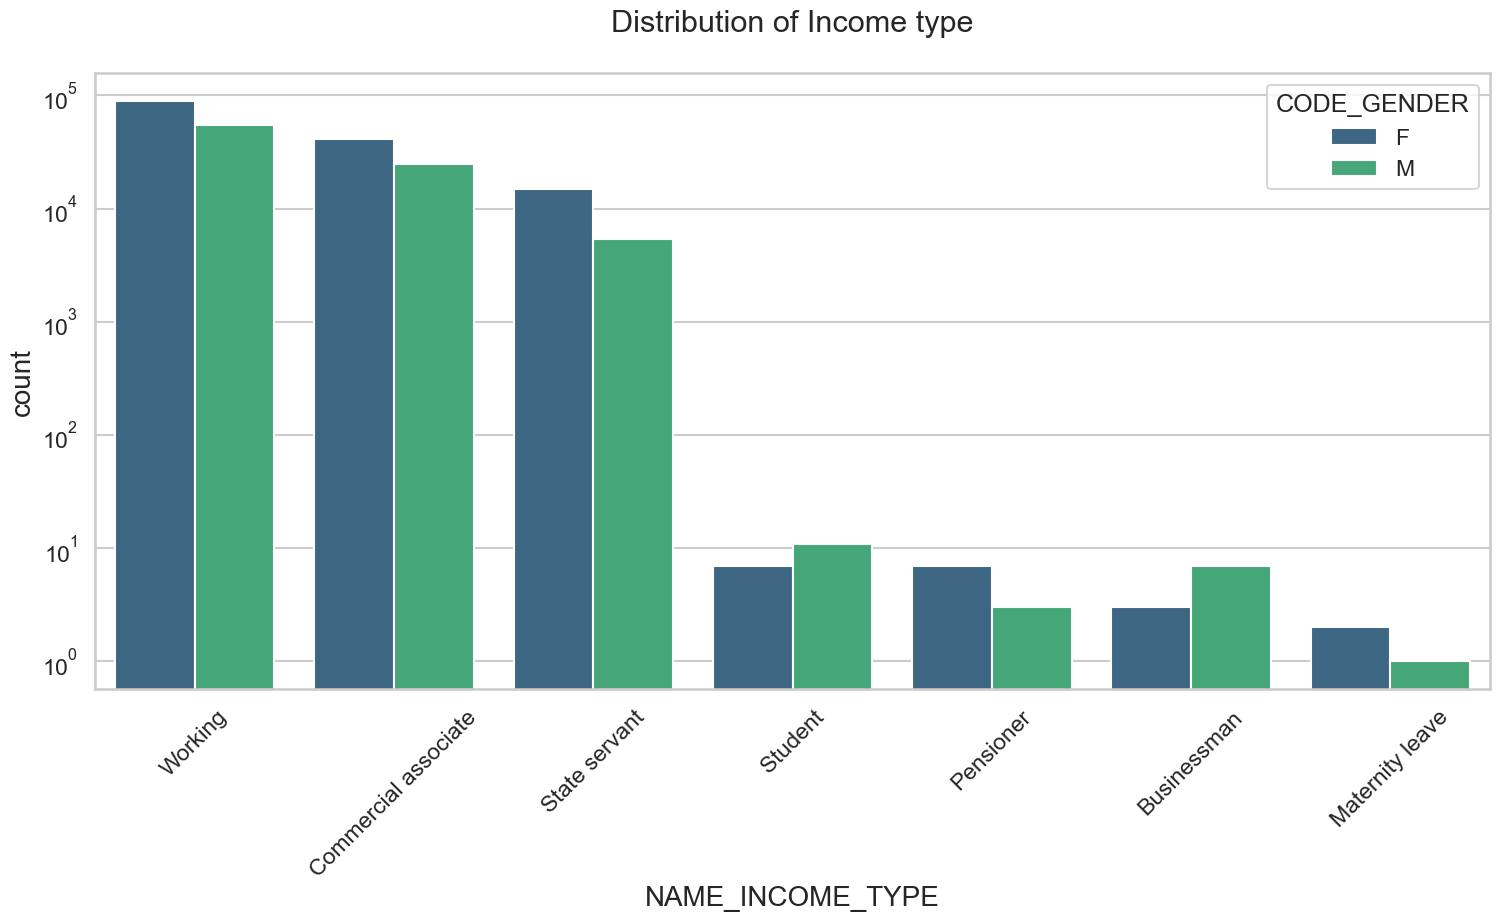

In [25]:
# Plotting for Income type

uniplot(target0_data, col = 'NAME_INCOME_TYPE', title = 'Distribution of Income type', hue = 'CODE_GENDER')

**Conclusions to be drawn from the graph above**
- Less credits are available for income categories such **"student,"** **"pensioner,"** **"businessman,"** and **"maternity leave"**
- There are more credits available for income types **"working," "commercial associate,"** and **"state servant"** than for the others.
- For this reason, women have more credits than men do.

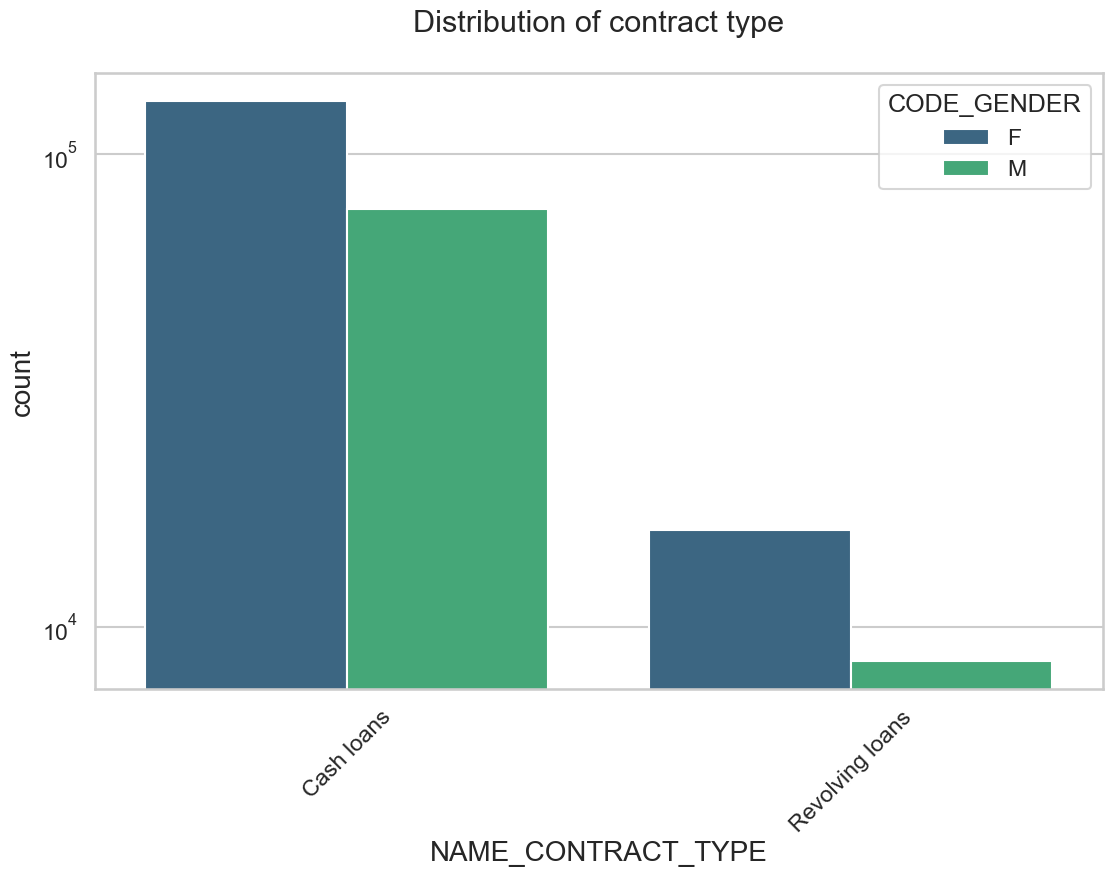

In [26]:
# Plotting for Contract type

uniplot(target0_data, col = 'NAME_CONTRACT_TYPE', title = 'Distribution of contract type', hue = 'CODE_GENDER')

**Conclusions to be drawn from the graph above**
- Cash loans, as a contract type, have a greater number of credits than **revolving loans**.
- Additionally, women are more likely than men to apply for credit.



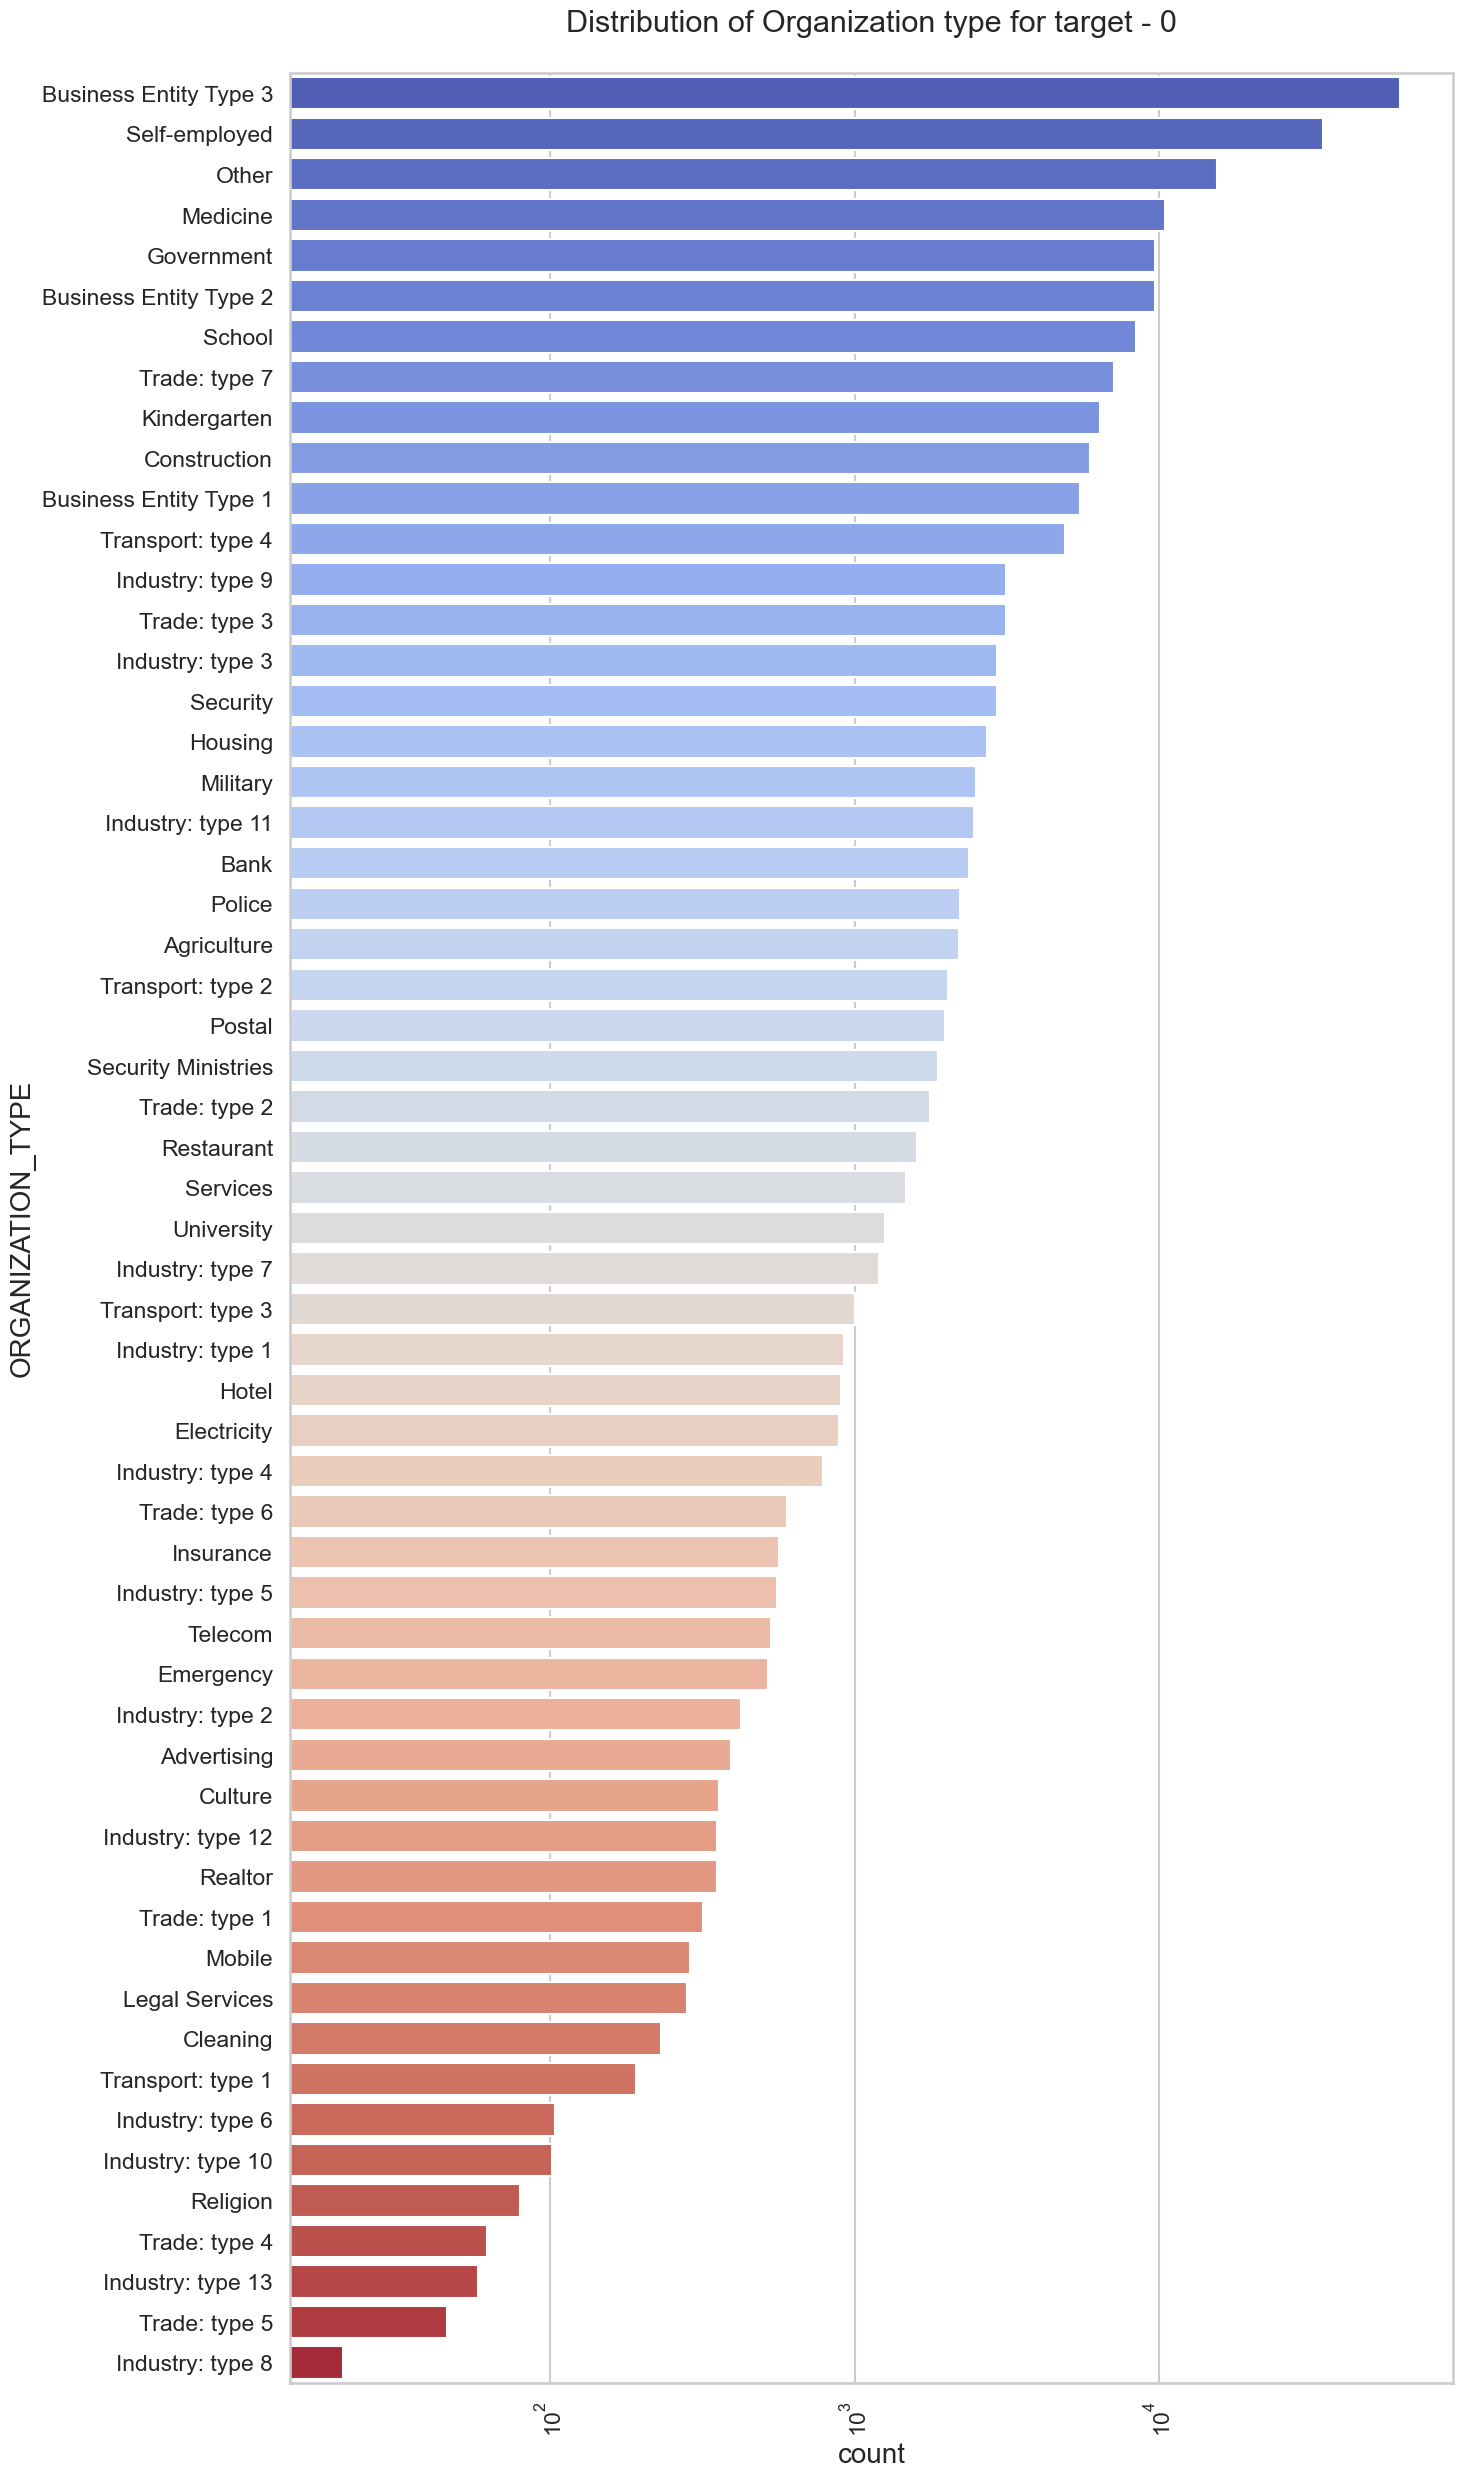

In [27]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_data,y='ORGANIZATION_TYPE',order=target0_data['ORGANIZATION_TYPE'].value_counts().index,palette='coolwarm')

plt.show()

**Conclusions to be drawn from the graph above**
- The majority of the clients who have requested credit are from the organisation types **Business entity Type 3**, **self         employed**, **Other**, **Medicine** and **Government**.
- Less customers come from industry types **8**, **6**, **10**, **relgion**, and **type 5** and **type 4 trade**.

#### Categoroical Univariate Analysis in logarithmic scale for target = 1 (client with payment difficulties)

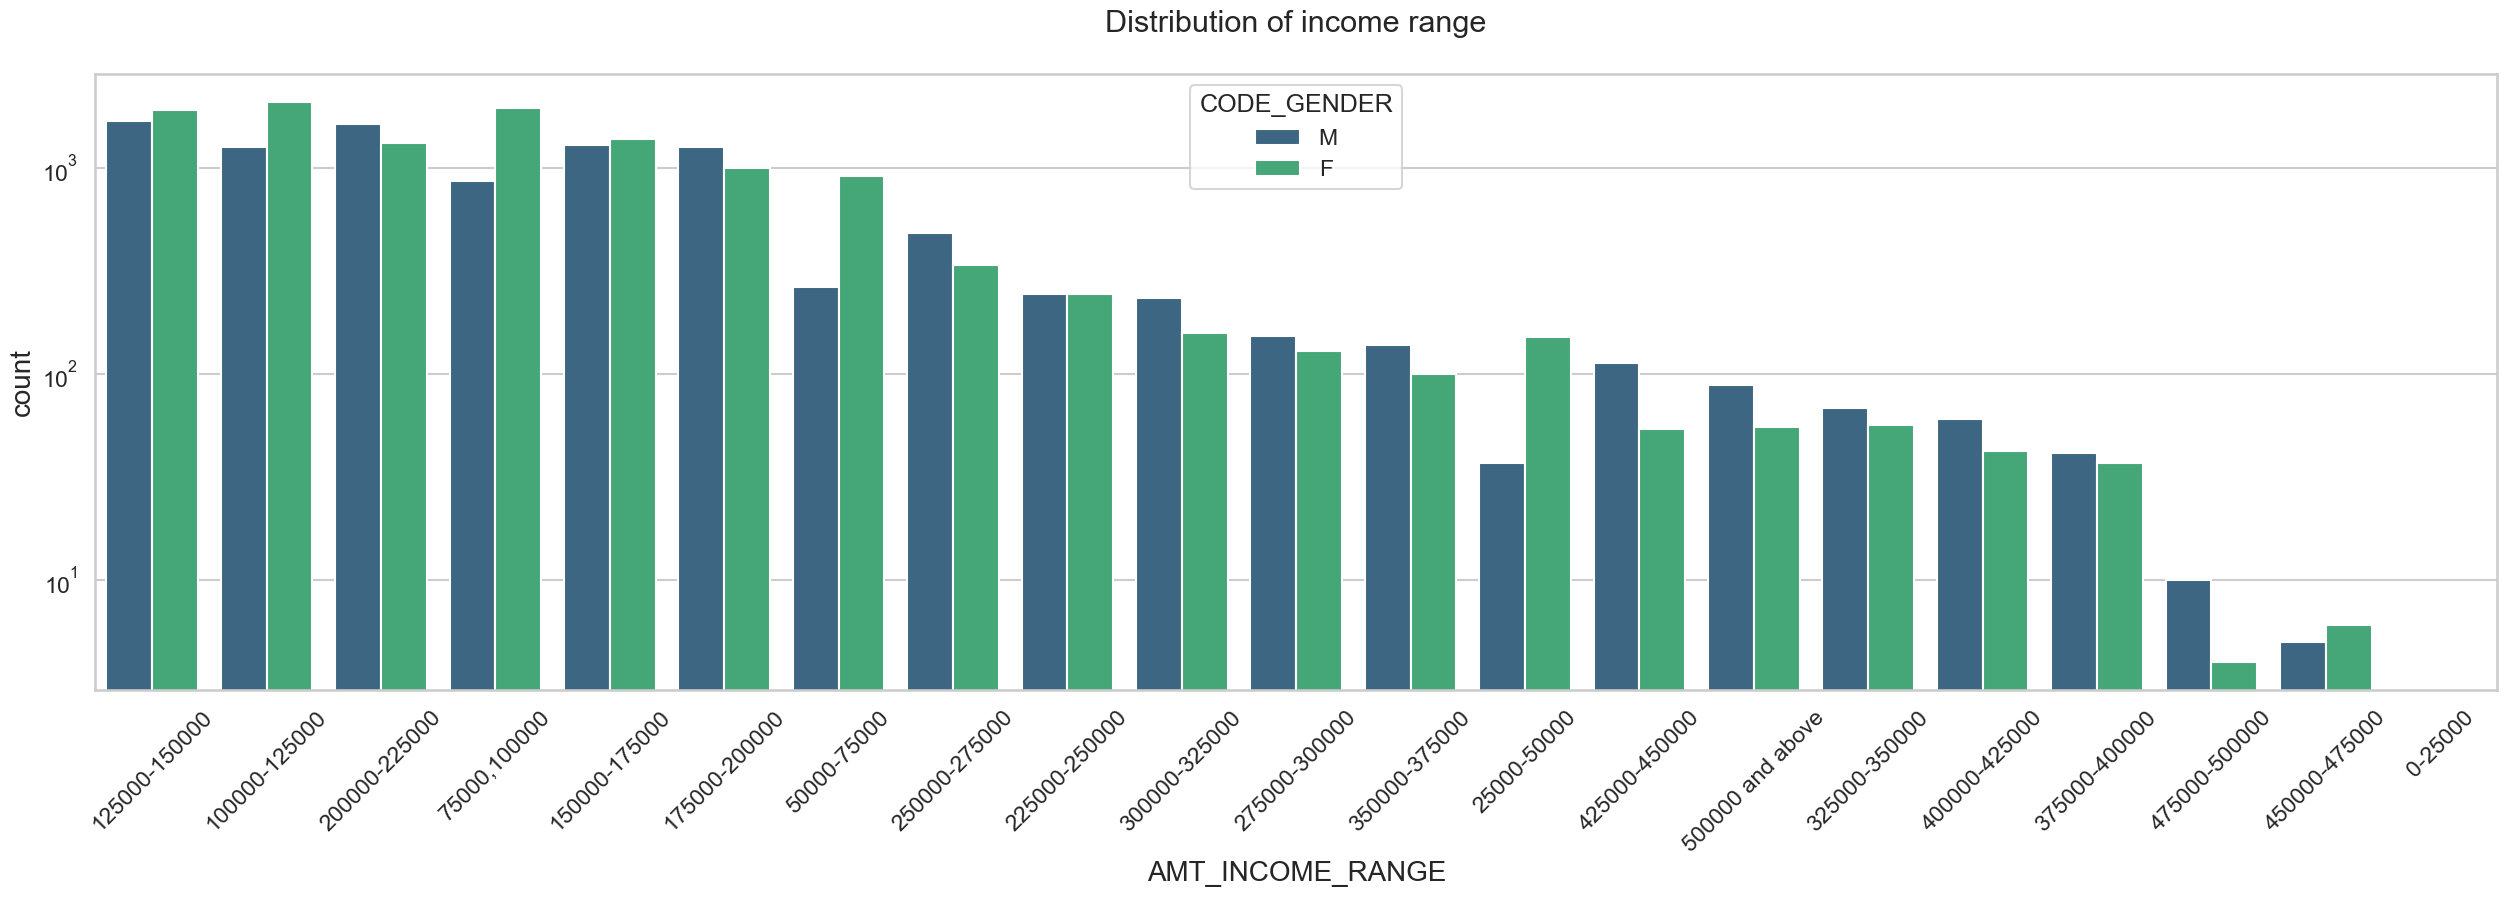

In [28]:
# PLotting the income range

uniplot(target1_data,col = 'AMT_INCOME_RANGE',title = 'Distribution of income range', hue = 'CODE_GENDER')

**Conclusions to be drawn from the graph above**
- Male numbers are **higher** than female counts.
- The income level between 100,000 and 200,000 has the most credits.
- This graph demonstrates that more men than women have credits in that range.
- The income level of 400000 and above has a very low count.

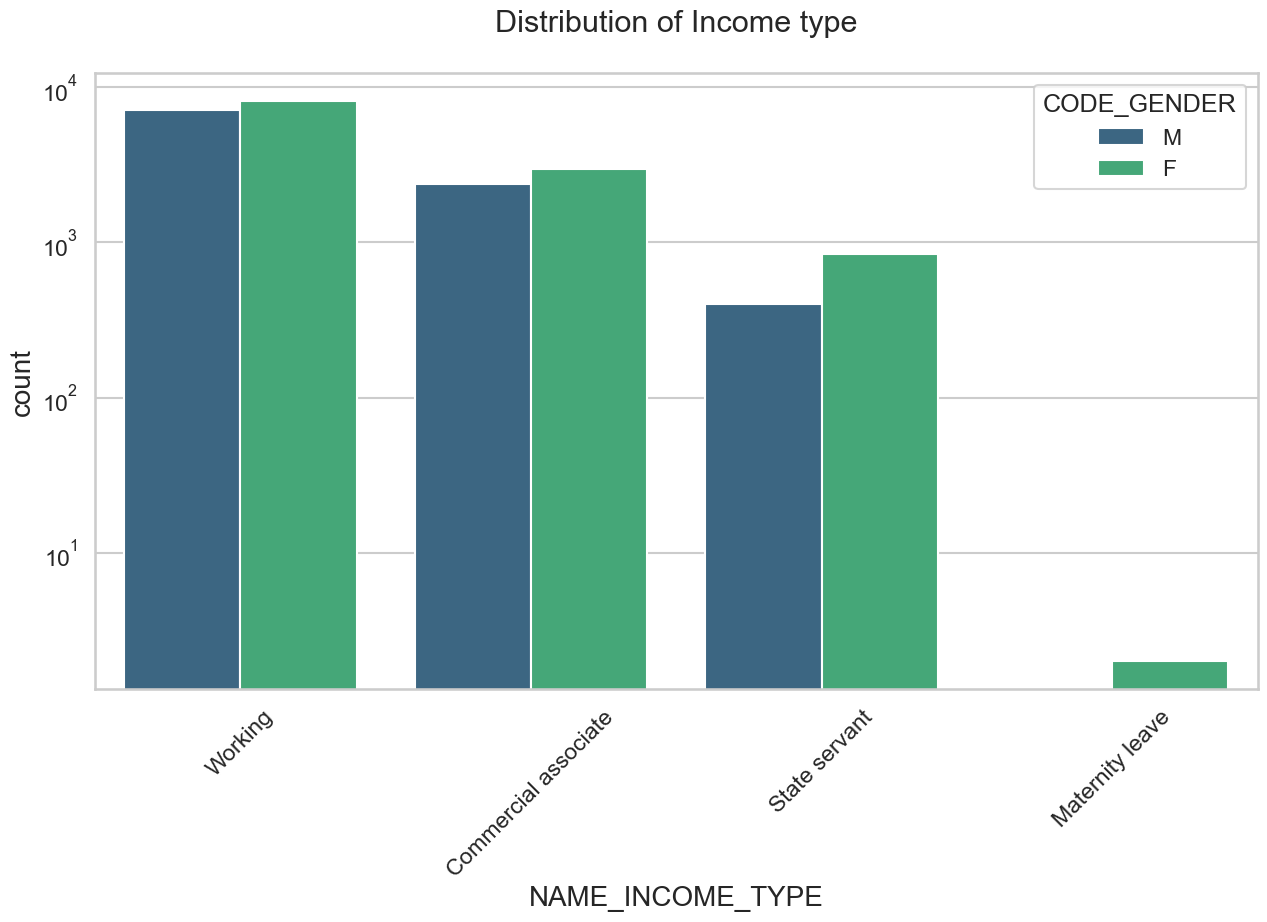

In [29]:
# Plotting for Income type

uniplot(target1_data,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

**Conclusions to be drawn from the graph above**
- The number of credits is higher for income types such as "working," "commercial associate," and "State Servant" than for other types, such as "Maternity leave."
- For this graph, women have more credits than men do.
- 'Maternity leave' income category has fewer credits.
- There is no income type for "student," "pensioner," and "businessman" under type 1, which means that they do not make late payments.

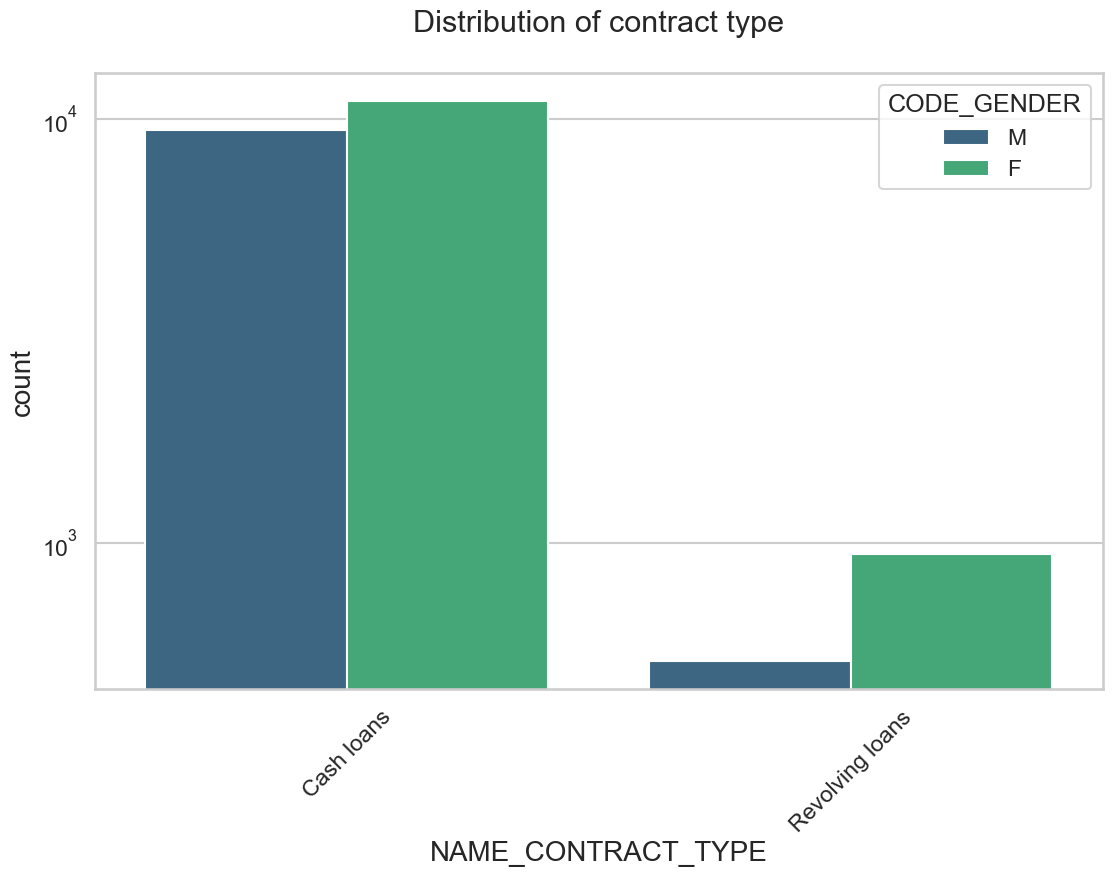

In [30]:
# Plotting for Contract type

uniplot(target1_data,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

**Conclusions to be drawn from the graph above**
- **Cash loans**, as a contract type, have a greater number of credits than **revolving loans**.
- Additionally, women are more likely than men to apply for credit.
- There are only female revolving loans for type 1.

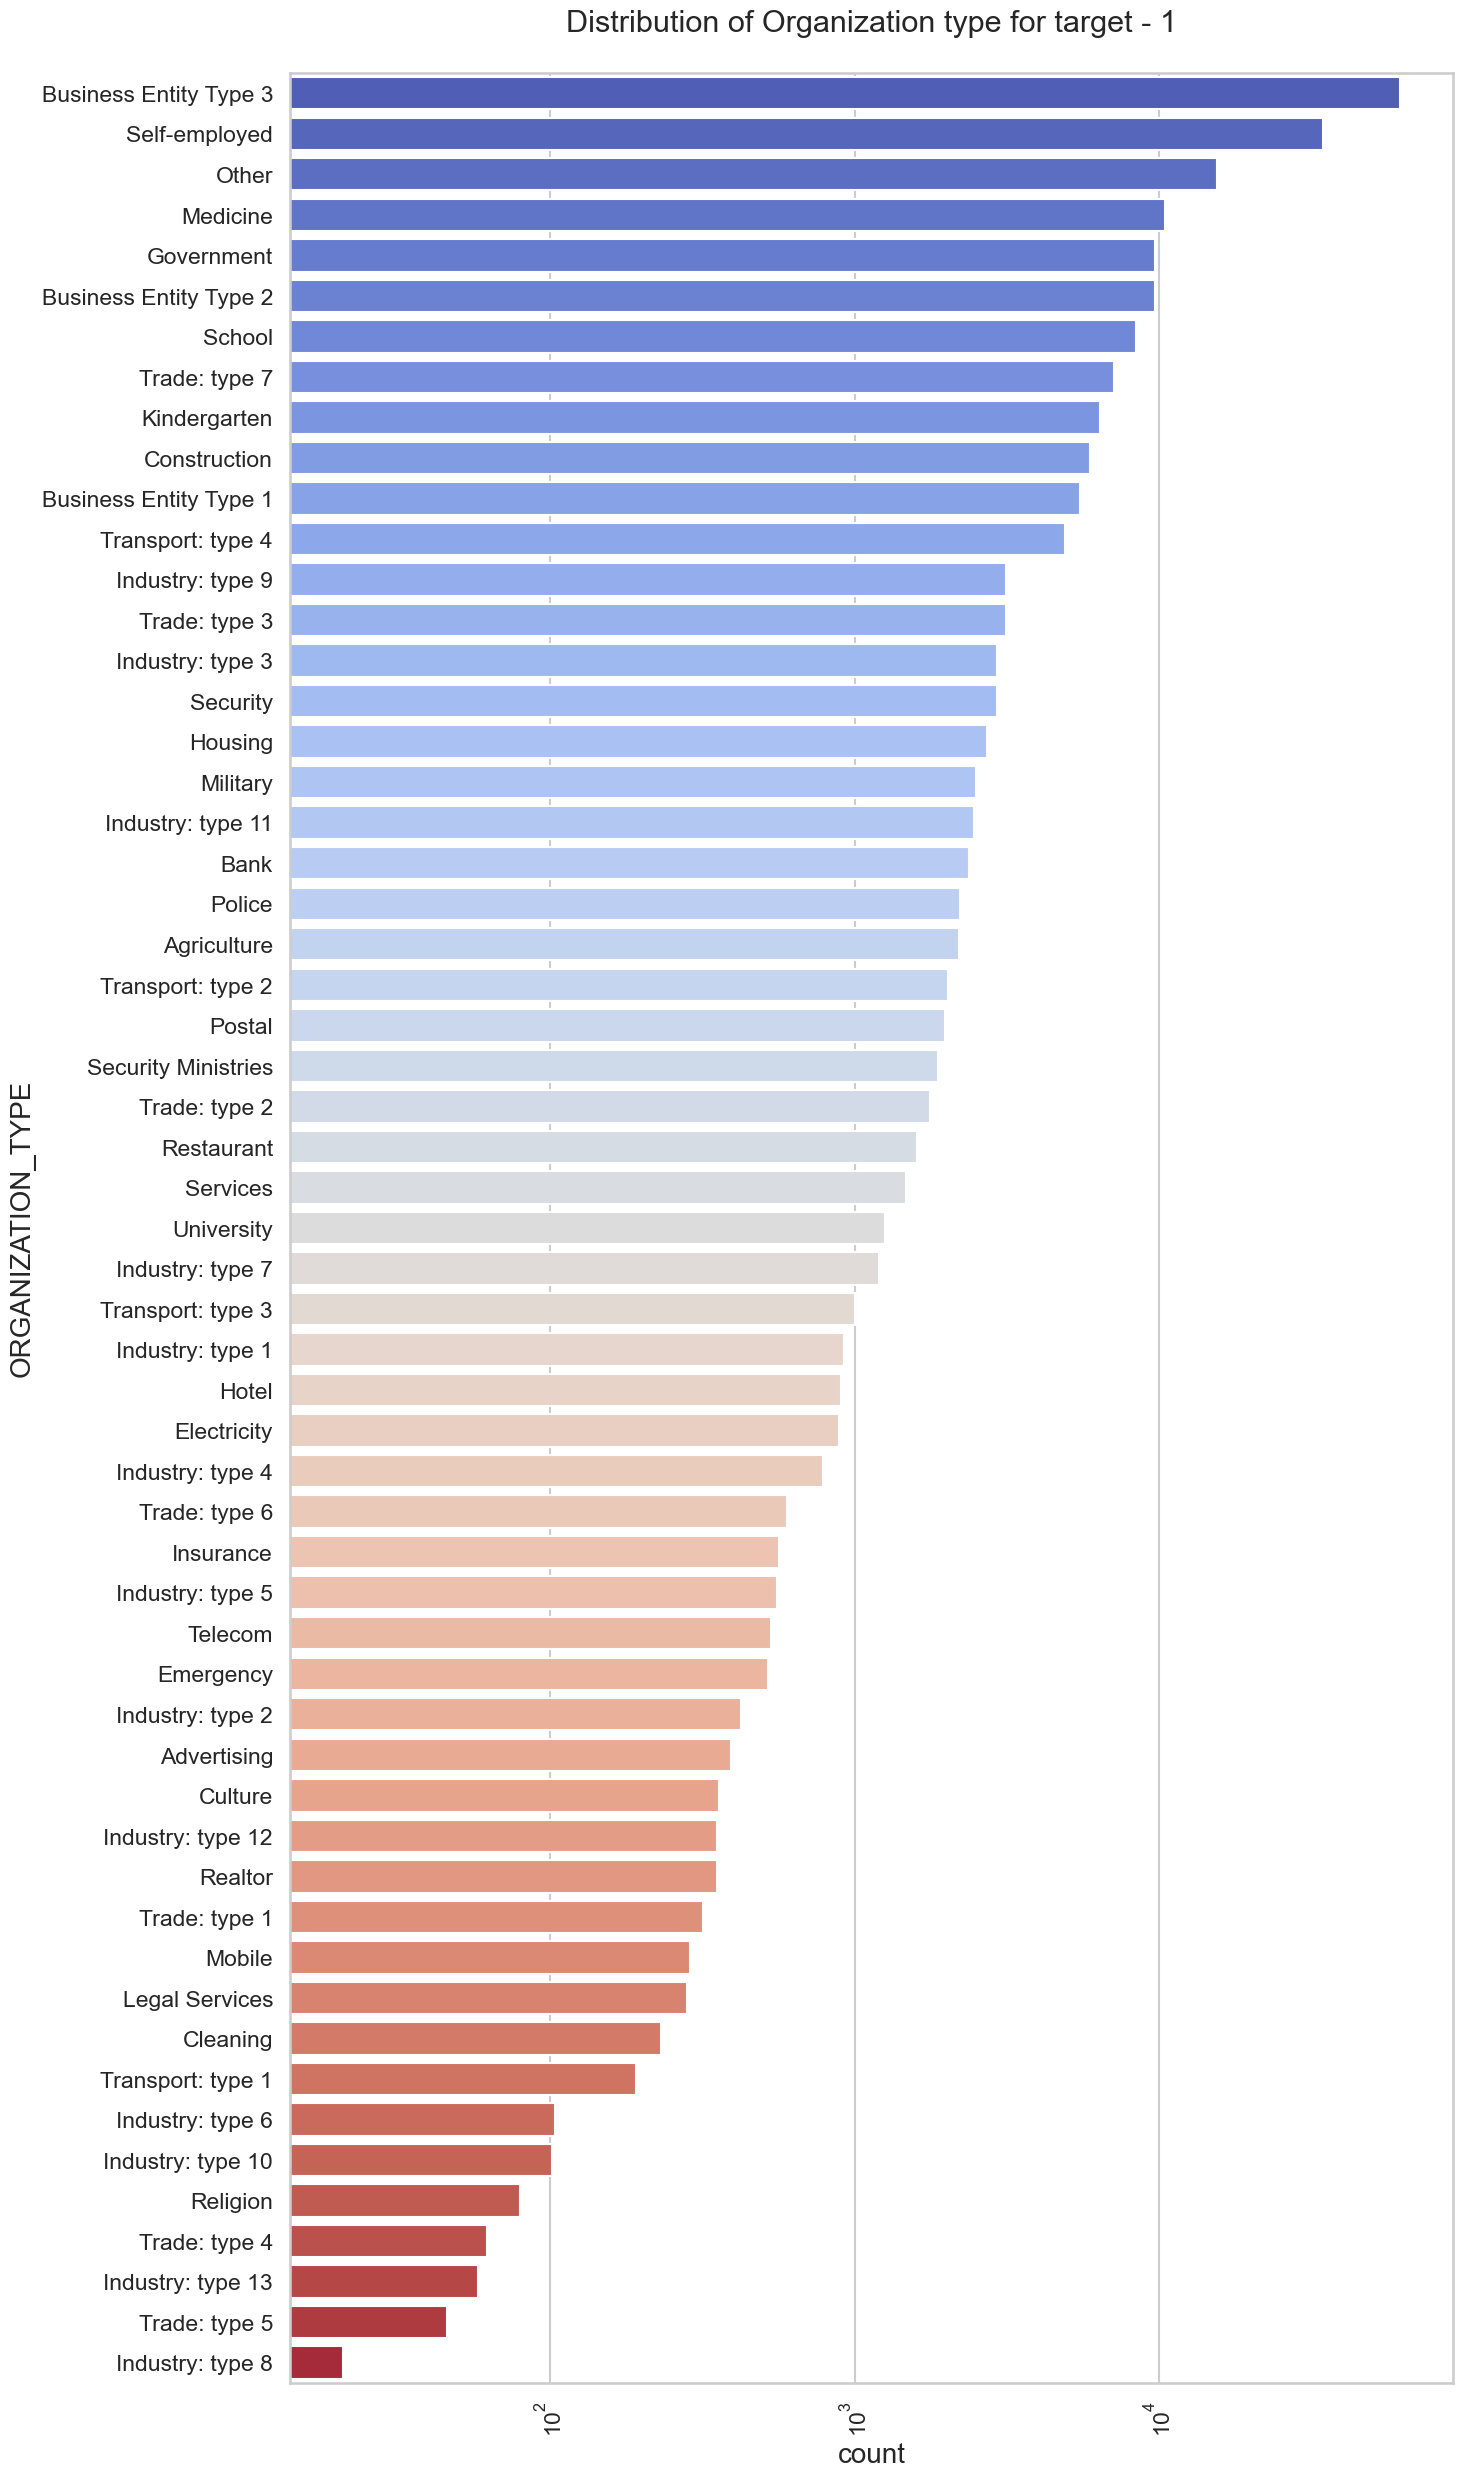

In [31]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_data,y='ORGANIZATION_TYPE',order=target0_data['ORGANIZATION_TYPE'].value_counts().index,palette='coolwarm')

plt.show()

**Conclusions to be drawn from the graph above**
- The majority of the clients who have requested credit are from the organisation types **Business entity Type 3**,  **Self employed**, **Other**, **Medicine** and **Government**.
- Less customers come from industry types **8**, **6**, **10**, **religion**, and **type 5** and **type 4** trade.
- In the distribution of organisation type, the same as **type 0**.

In [32]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_data.iloc[0:,2:]
target1_corr=target1_data.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [33]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [34]:
# Correlation for target 1

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [35]:
# visualising the above correlation with heat map

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice, im using flare


    sns.heatmap(data,annot=False)
    sns.color_palette("flare", as_cmap=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

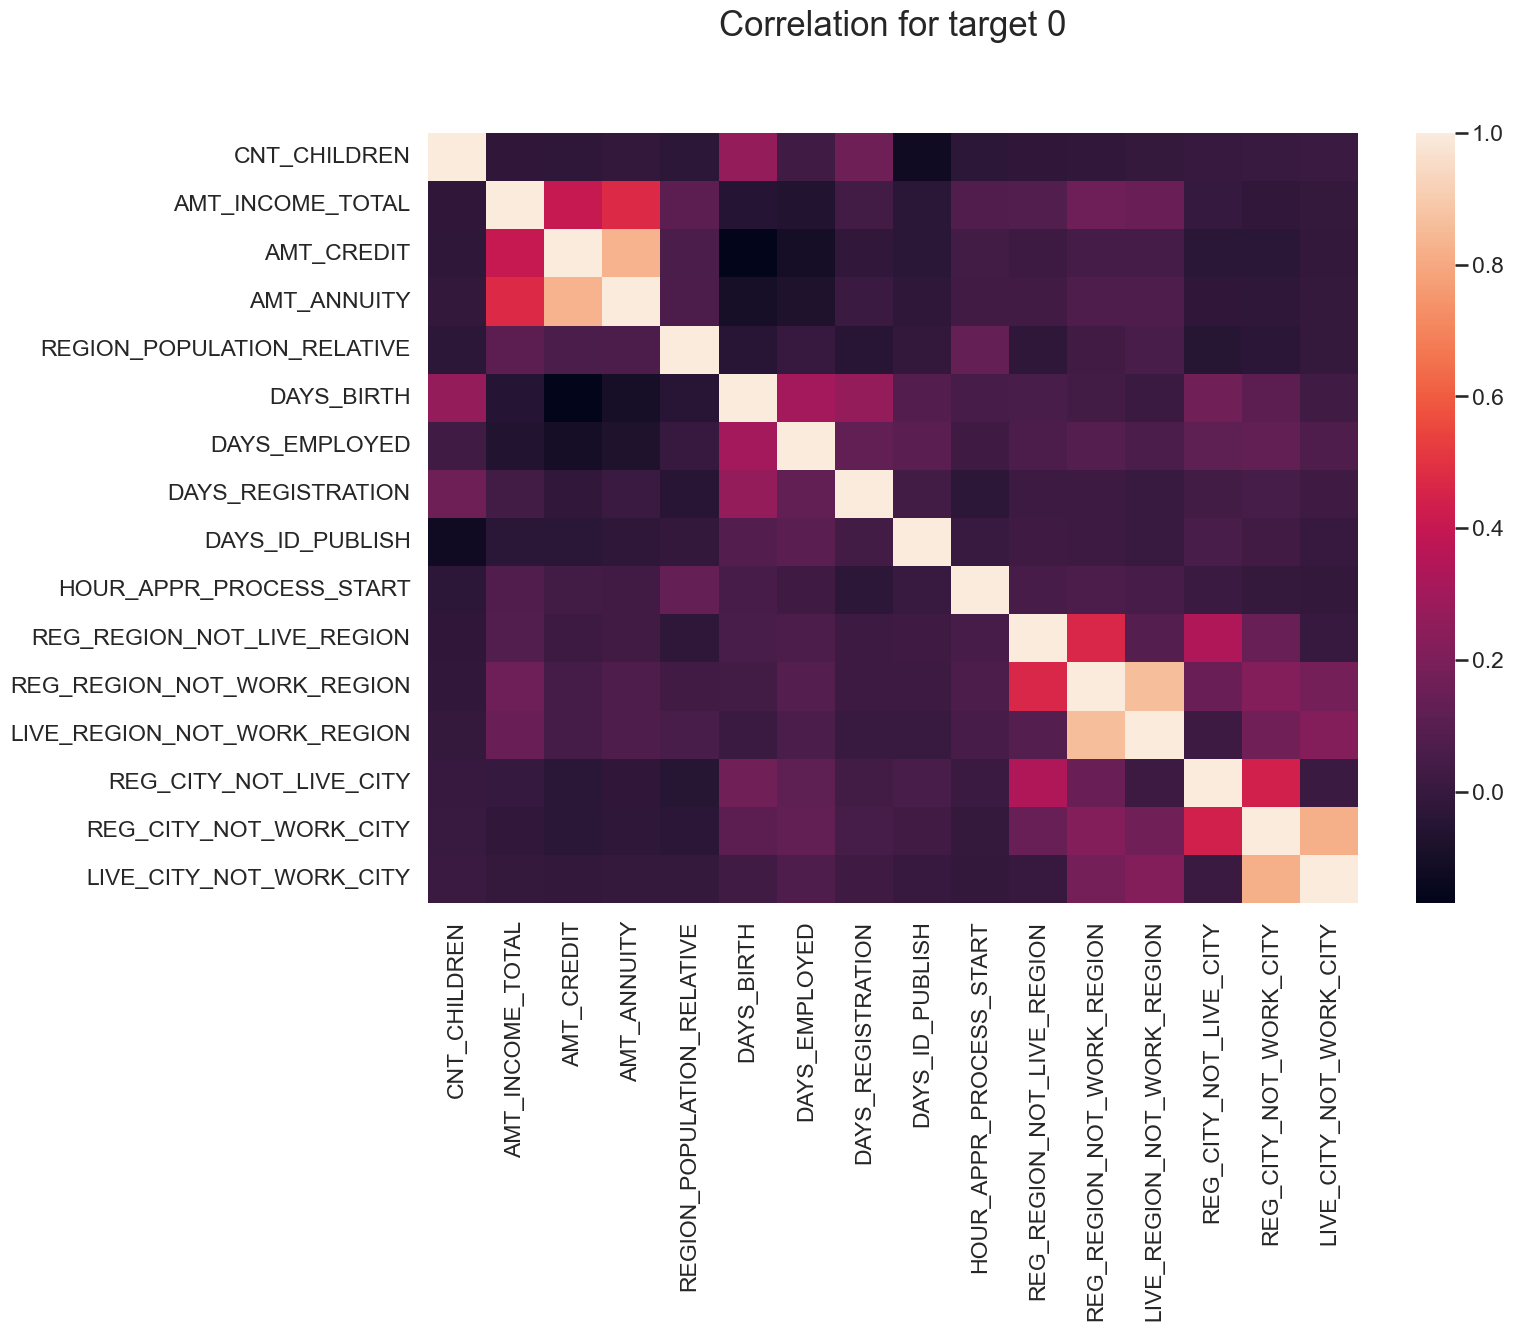

In [36]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

**Conclusions to be drawn from the Heatmap above**
- Since credit amount and birthdate are inversely related, credit amount is higher for younger people and vice versa.
- The quantity of credit is inversely correlated with the number of children a client has, so the amount of credit is larger when the client has fewer children and vice versa.
- In a heavily populated location, clients have fewer children.
- Credit is given in greater amounts to heavily inhabited areas.
- In areas with high population density, income is also higher.

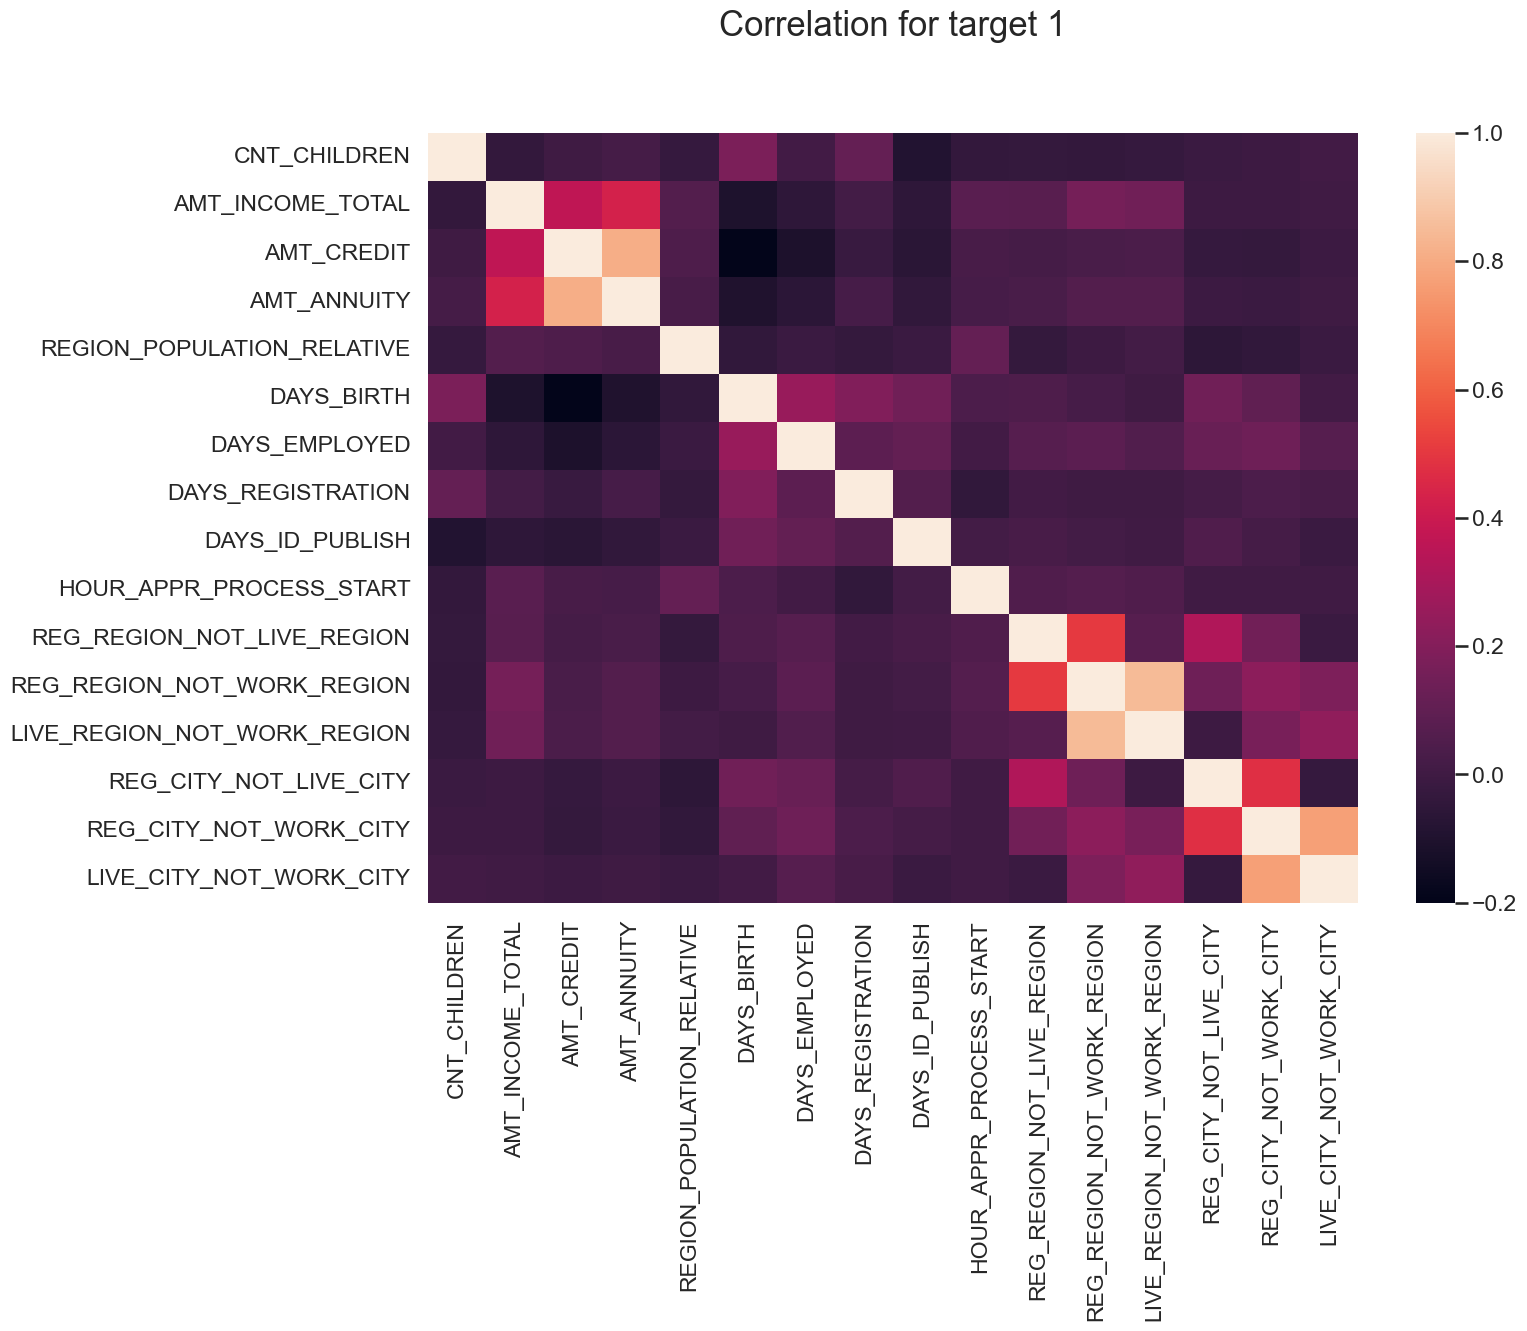

In [37]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

**This heat map for Target 1 shares many of the same observations as Target 0 does. However, there are some differences. Below is a list of them**.
- There are fewer children being born at the client's permanent address than at their contact address, and vice versa.- 
- less children are being born to clients whose permanent addresses differ from their work addresses, and vice versa

In [38]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_analysis(data,col,title):

    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 26
    
    plt.title(title)
    plt.yscale('log')
    
    ax = sns.boxplot(data =target1_data,orient='v', y=col)
    ax.set(autoscale_on=True)
    plt.show()
    

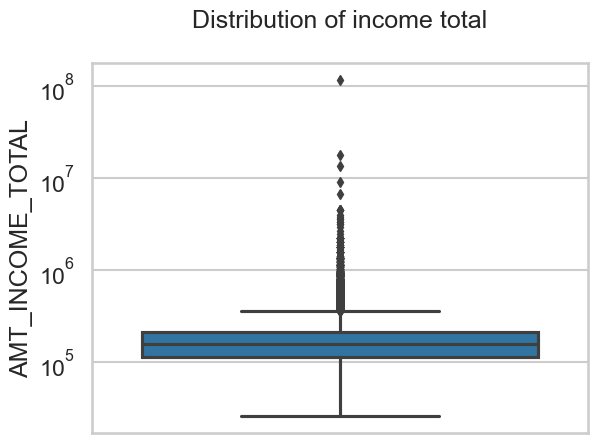

In [39]:
# Distribution of income amount

univariate_analysis(data=target0_data,col=data['AMT_INCOME_TOTAL'],title='Distribution of income total')

**The boxplot above can be used to draw a few conclusions**.

- There are some outliers in the earning amount.
- The income amount in the third quartile is quite low

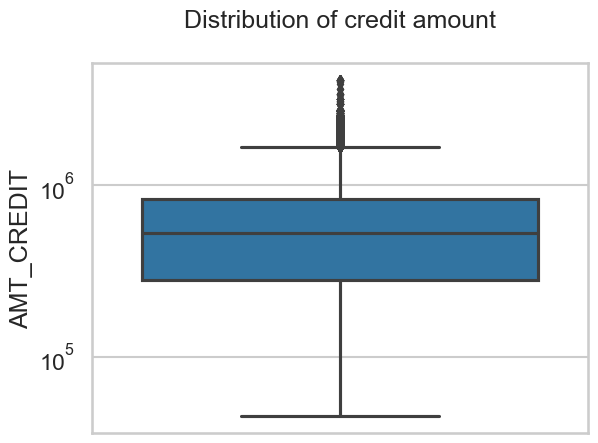

In [40]:
# Disrtibution of credit amount

univariate_analysis(data=target0_data,col=data['AMT_CREDIT'],title='Distribution of credit amount')

**The boxplot above can be used to draw a few conclusions**.

- Outliers may be seen in credit amounts.
- The 1st quartile is greater than the 3rd quartile for credit amounts. This means that most of the credits are from customers in the first quartile.

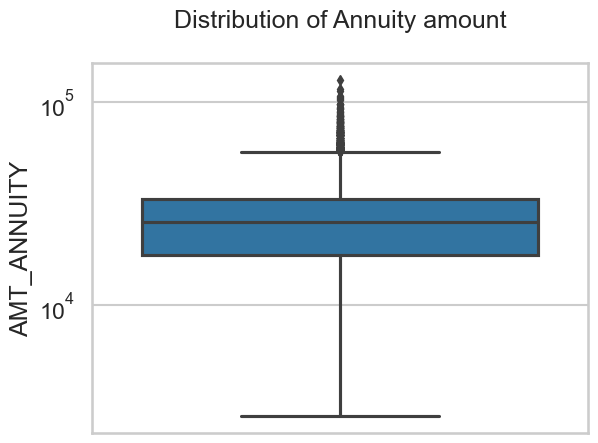

In [41]:
# Distribution of anuuity amount

univariate_analysis(data=target0_data,col='AMT_ANNUITY',title='Distribution of Annuity amount')

**The boxplot above can be used to draw a few conclusions**.

- In the annuity amount, some anomalies have been found.
- The first quartile accounts for the majority of annuity clients since it has a larger annuity amount than the third quartile.

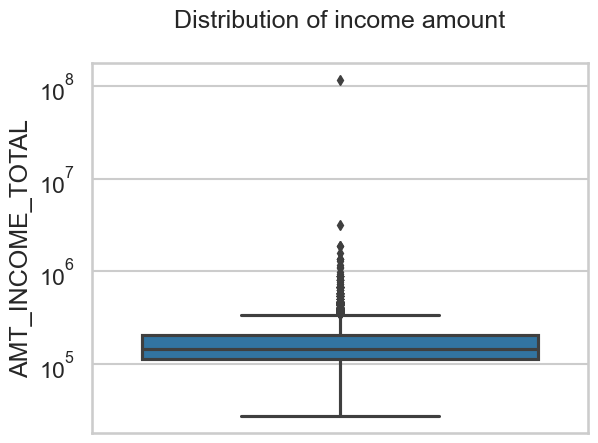

In [42]:
# Distribution of income amount

univariate_analysis(data=target1_data,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

**The boxplot above can be used to draw a few conclusions**.

- Outliers may be seen in income amounts.
- The 3rd quartile for income amounts is small. 
- This means that most of the income amounts are from customers in the first quartile.

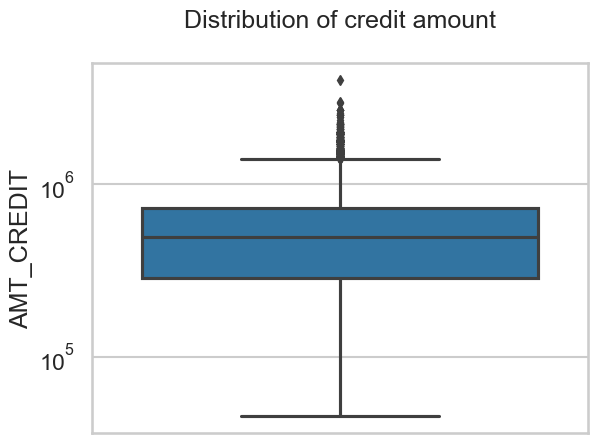

In [43]:
# Distribution of credit amount

univariate_analysis(data=target1_data,col='AMT_CREDIT',title='Distribution of credit amount')

**The boxplot above can be used to draw a few conclusions**.

- In the credit amount, some outliers have been found.
- The first quartile accounts for the majority of credit amounts since it has a larger credit amount than the third quartile.

#### Bivariate Analysis for the numerical values

***For Target 0***

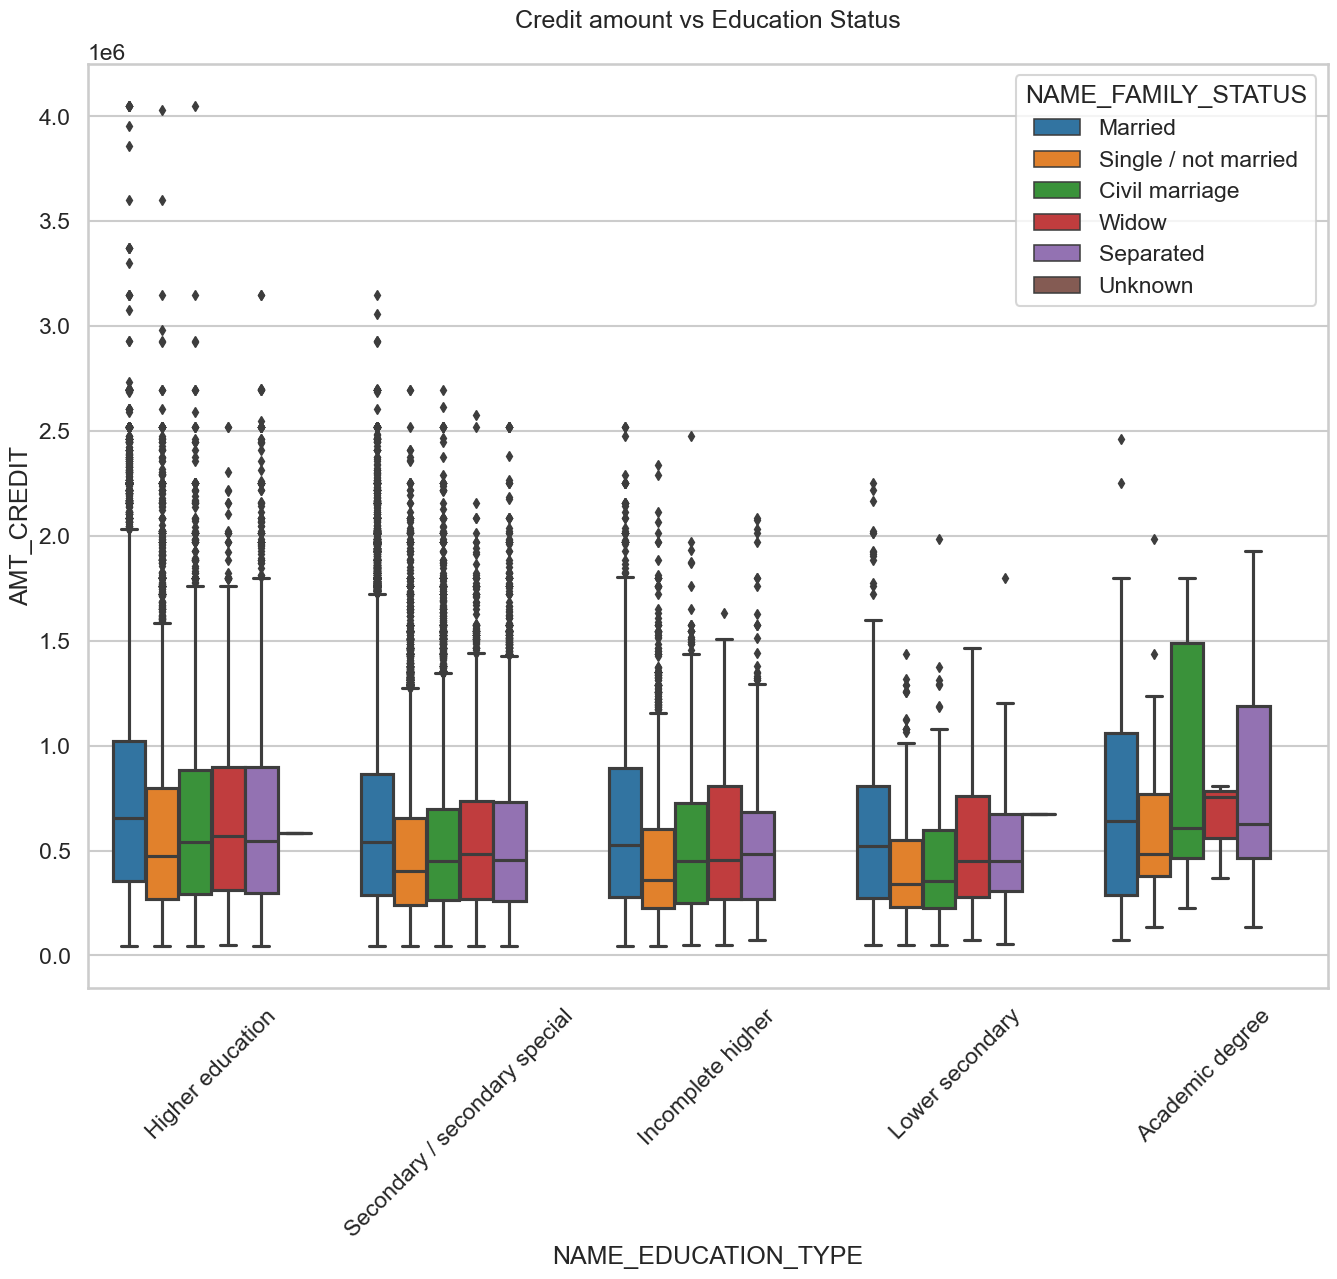

In [44]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

According to the above box plot, family statuses of 'civil marriage,''marriage,' and'separated' of Academic degree education have a higher number of credits than others.\
Furthermore, greater education and family status of'marriage,''single,' and 'civil marriage' have more outliers. The majority of the credits for a civil marriage for an academic degree are in the third quartile.

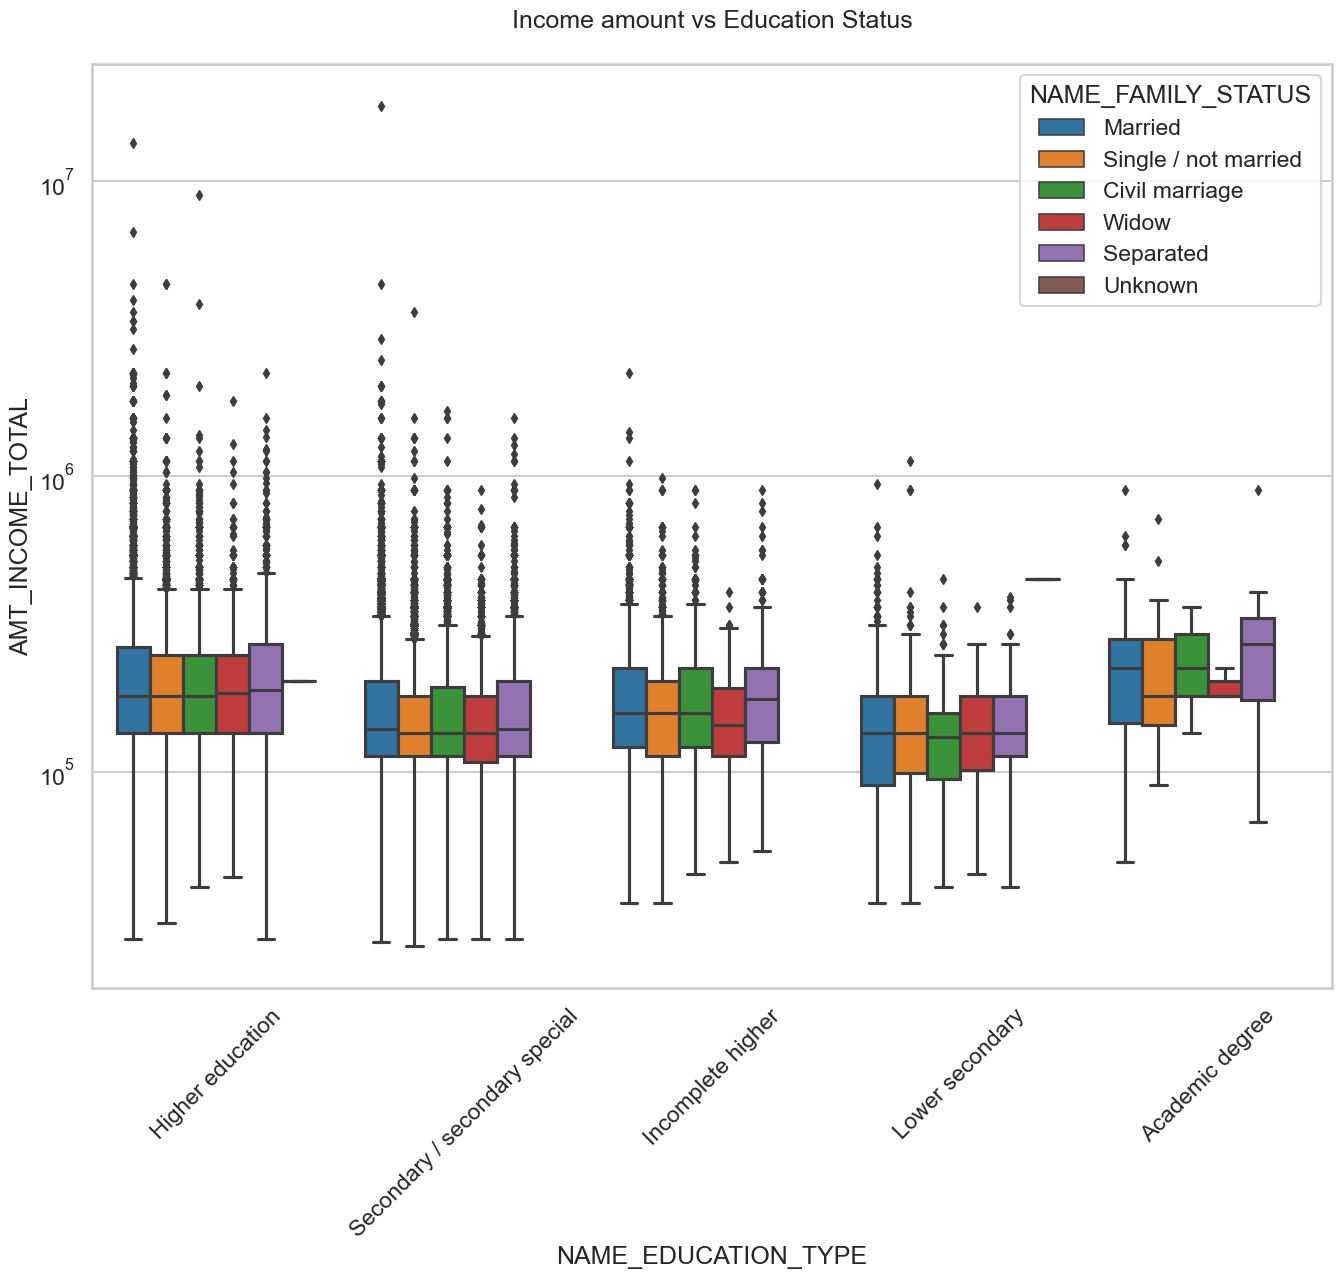

In [45]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

According to the above boxplot, the income amount for Education type 'Higher education' is basically equivalent with family status. It does have a lot of outliers. Academic degrees are less outlier, but their income is slightly greater than higher education. Lower secondary civil marriage family status has lower income than others.

***For Target 1***

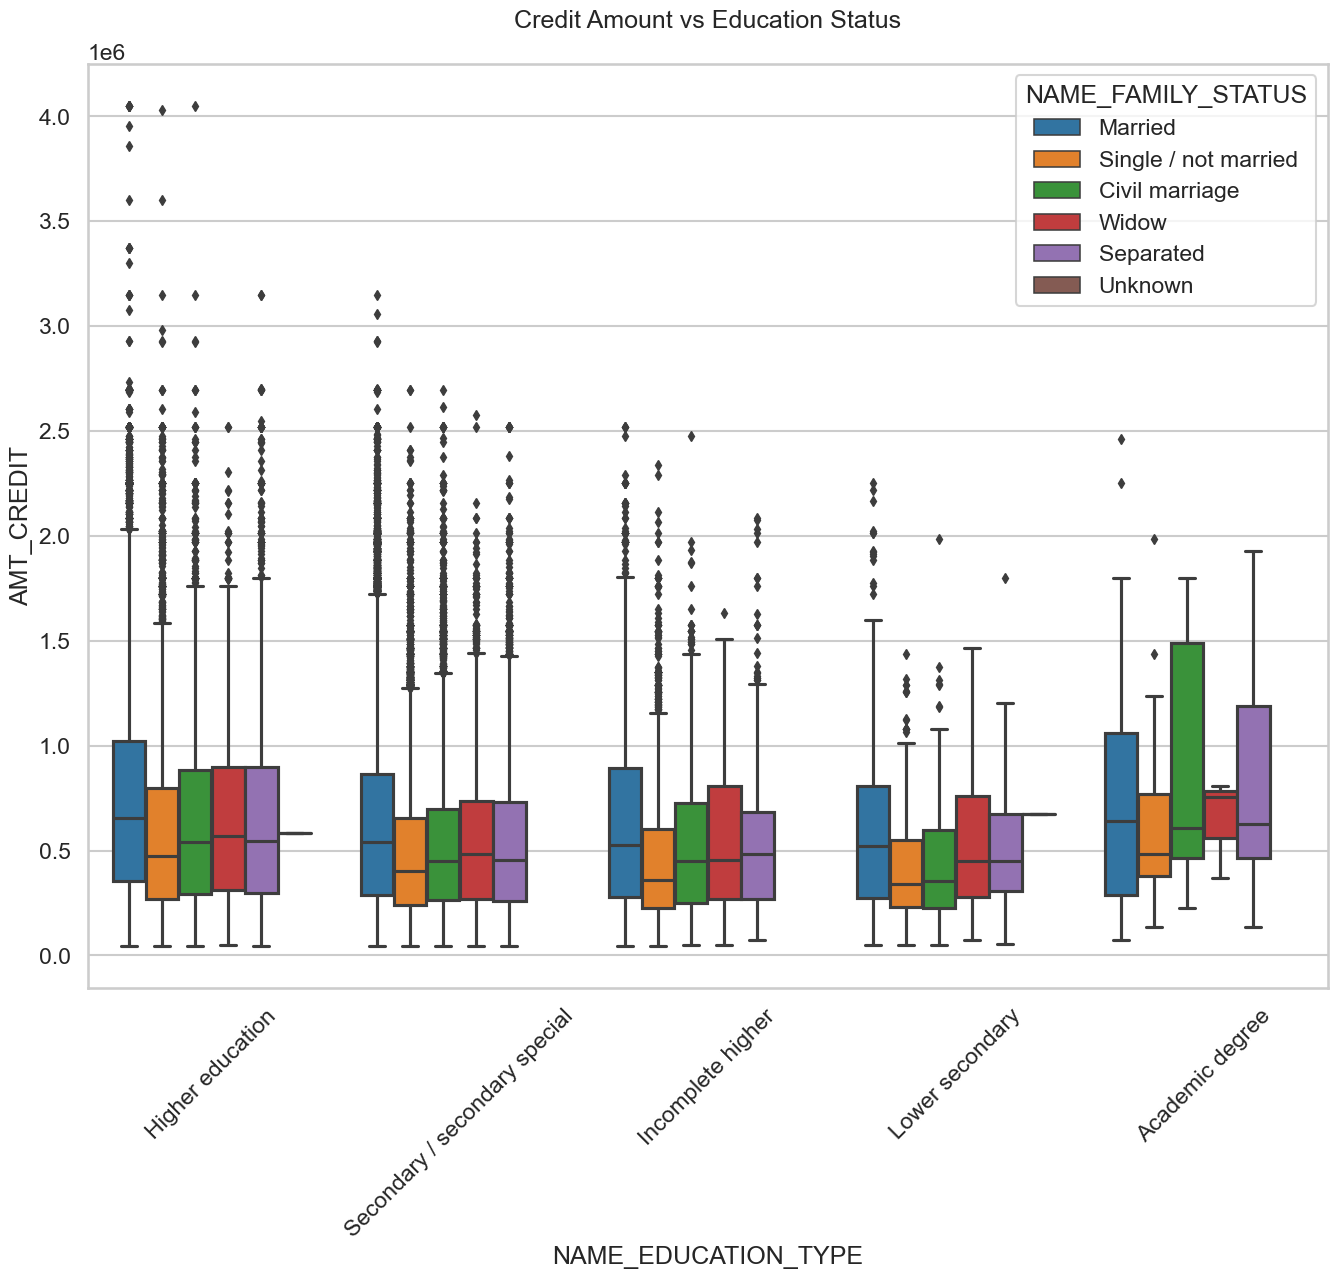

In [46]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Target 0 analysis is very similar to this. According to the above box plot, academic degree holders with family statuses of "civil marriage," "marriage," and "separated" have more credits than those with other statuses. Higher education and secondary education make up the majority of the outliers in the data. Most of the credits for civil unions for academic degrees are in the third quartile.

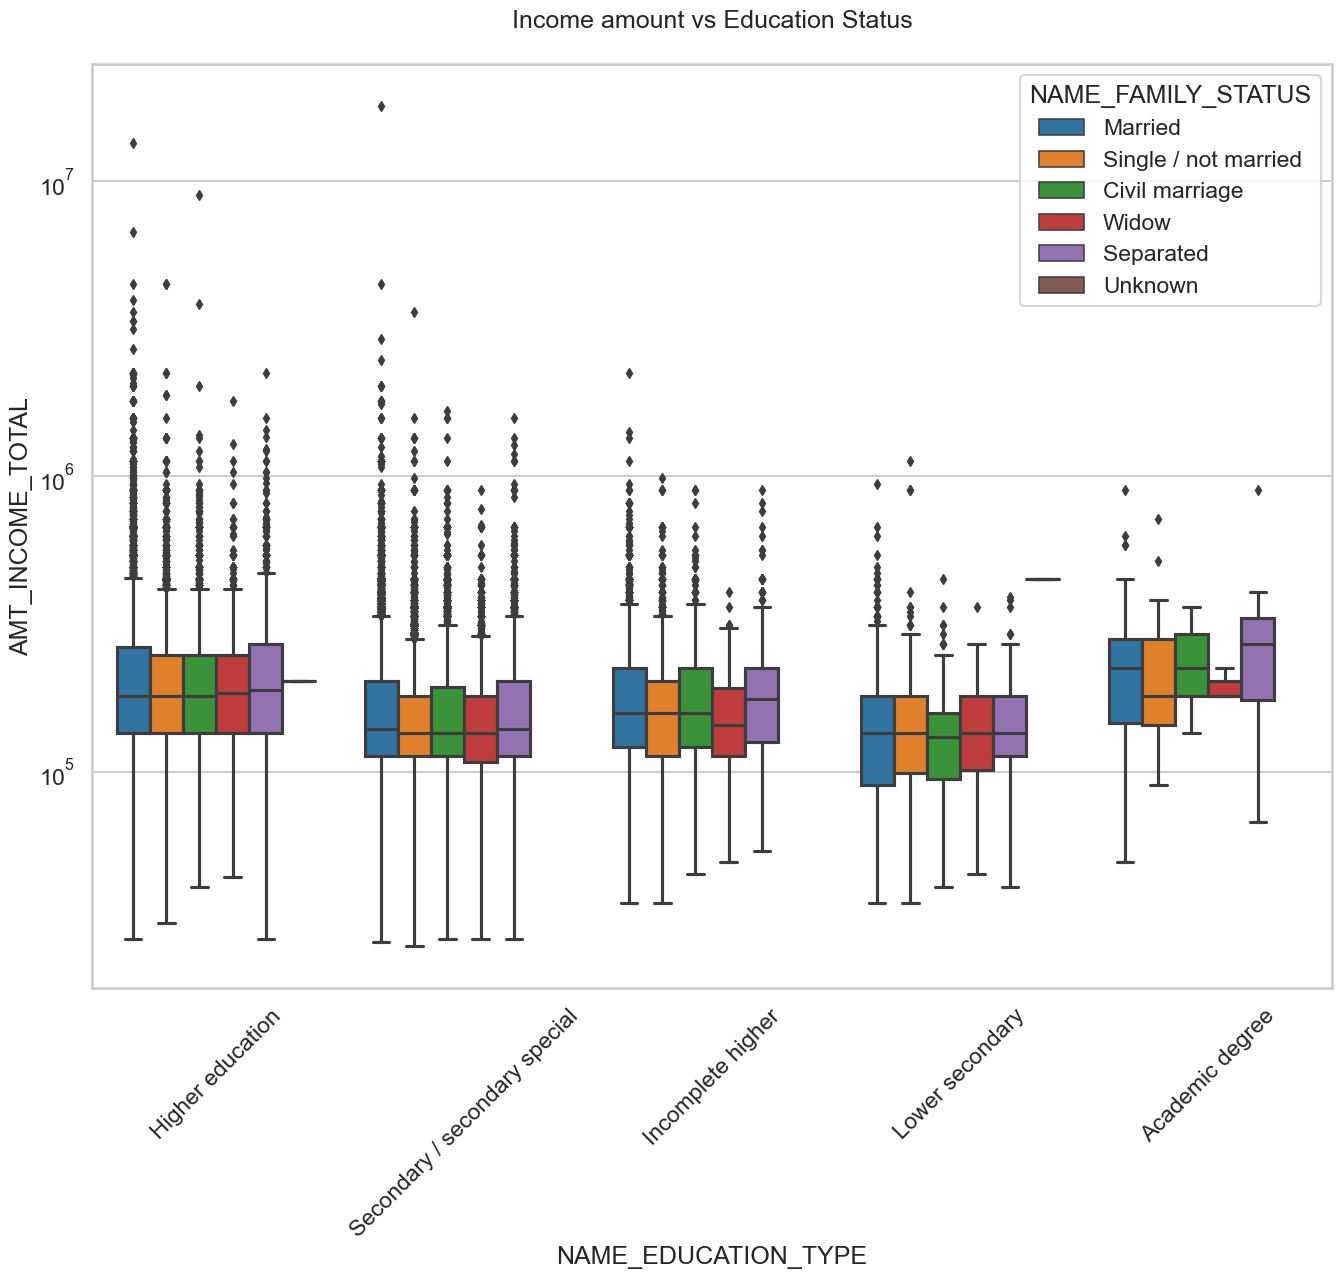

In [47]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Having some similarities to Target 0, and according to the boxplot above for the education category "Higher education," income levels are often comparable to family circumstances. Fewer outliers have academic degrees, yet their salary is a little greater than that of those with higher education. Less money is made than at higher secondary schools.

### Analysing the previous application data

In [48]:
# Reading the dataset of previous application

data1=pd.read_csv("previous_application.csv")

In [49]:
# Cleaning the missing data

# listing the null values columns having more than 30%

nullcol1=data1.isnull().sum()
nullcol1=nullcol1[nullcol1.values>(0.3*len(nullcol1))]
len(nullcol1)

15

In [50]:
# Removing those 15 columns

nullcol1 = list(nullcol1[nullcol1.values>=0.3].index)
data1.drop(labels=nullcol1,axis=1,inplace=True)

data1.shape

(1670214, 22)

In [51]:
# Removing the column values of 'XNA' and 'XAP'

data1=data1.drop(data1[data1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
data1=data1.drop(data1[data1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
data1=data1.drop(data1[data1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

data1.shape

(69635, 22)

In [52]:
# Now merging the Application dataset with previous appliaction dataset

new_data=pd.merge(left=data,right=data1 ,how='inner',on='SK_ID_CURR',suffixes=('_x'))

In [53]:
# Renaming the column names after merging

new_data1 = new_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [54]:
# Removing unwanted columns for analysis

new_data1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

#### Performing Univariate Analysis

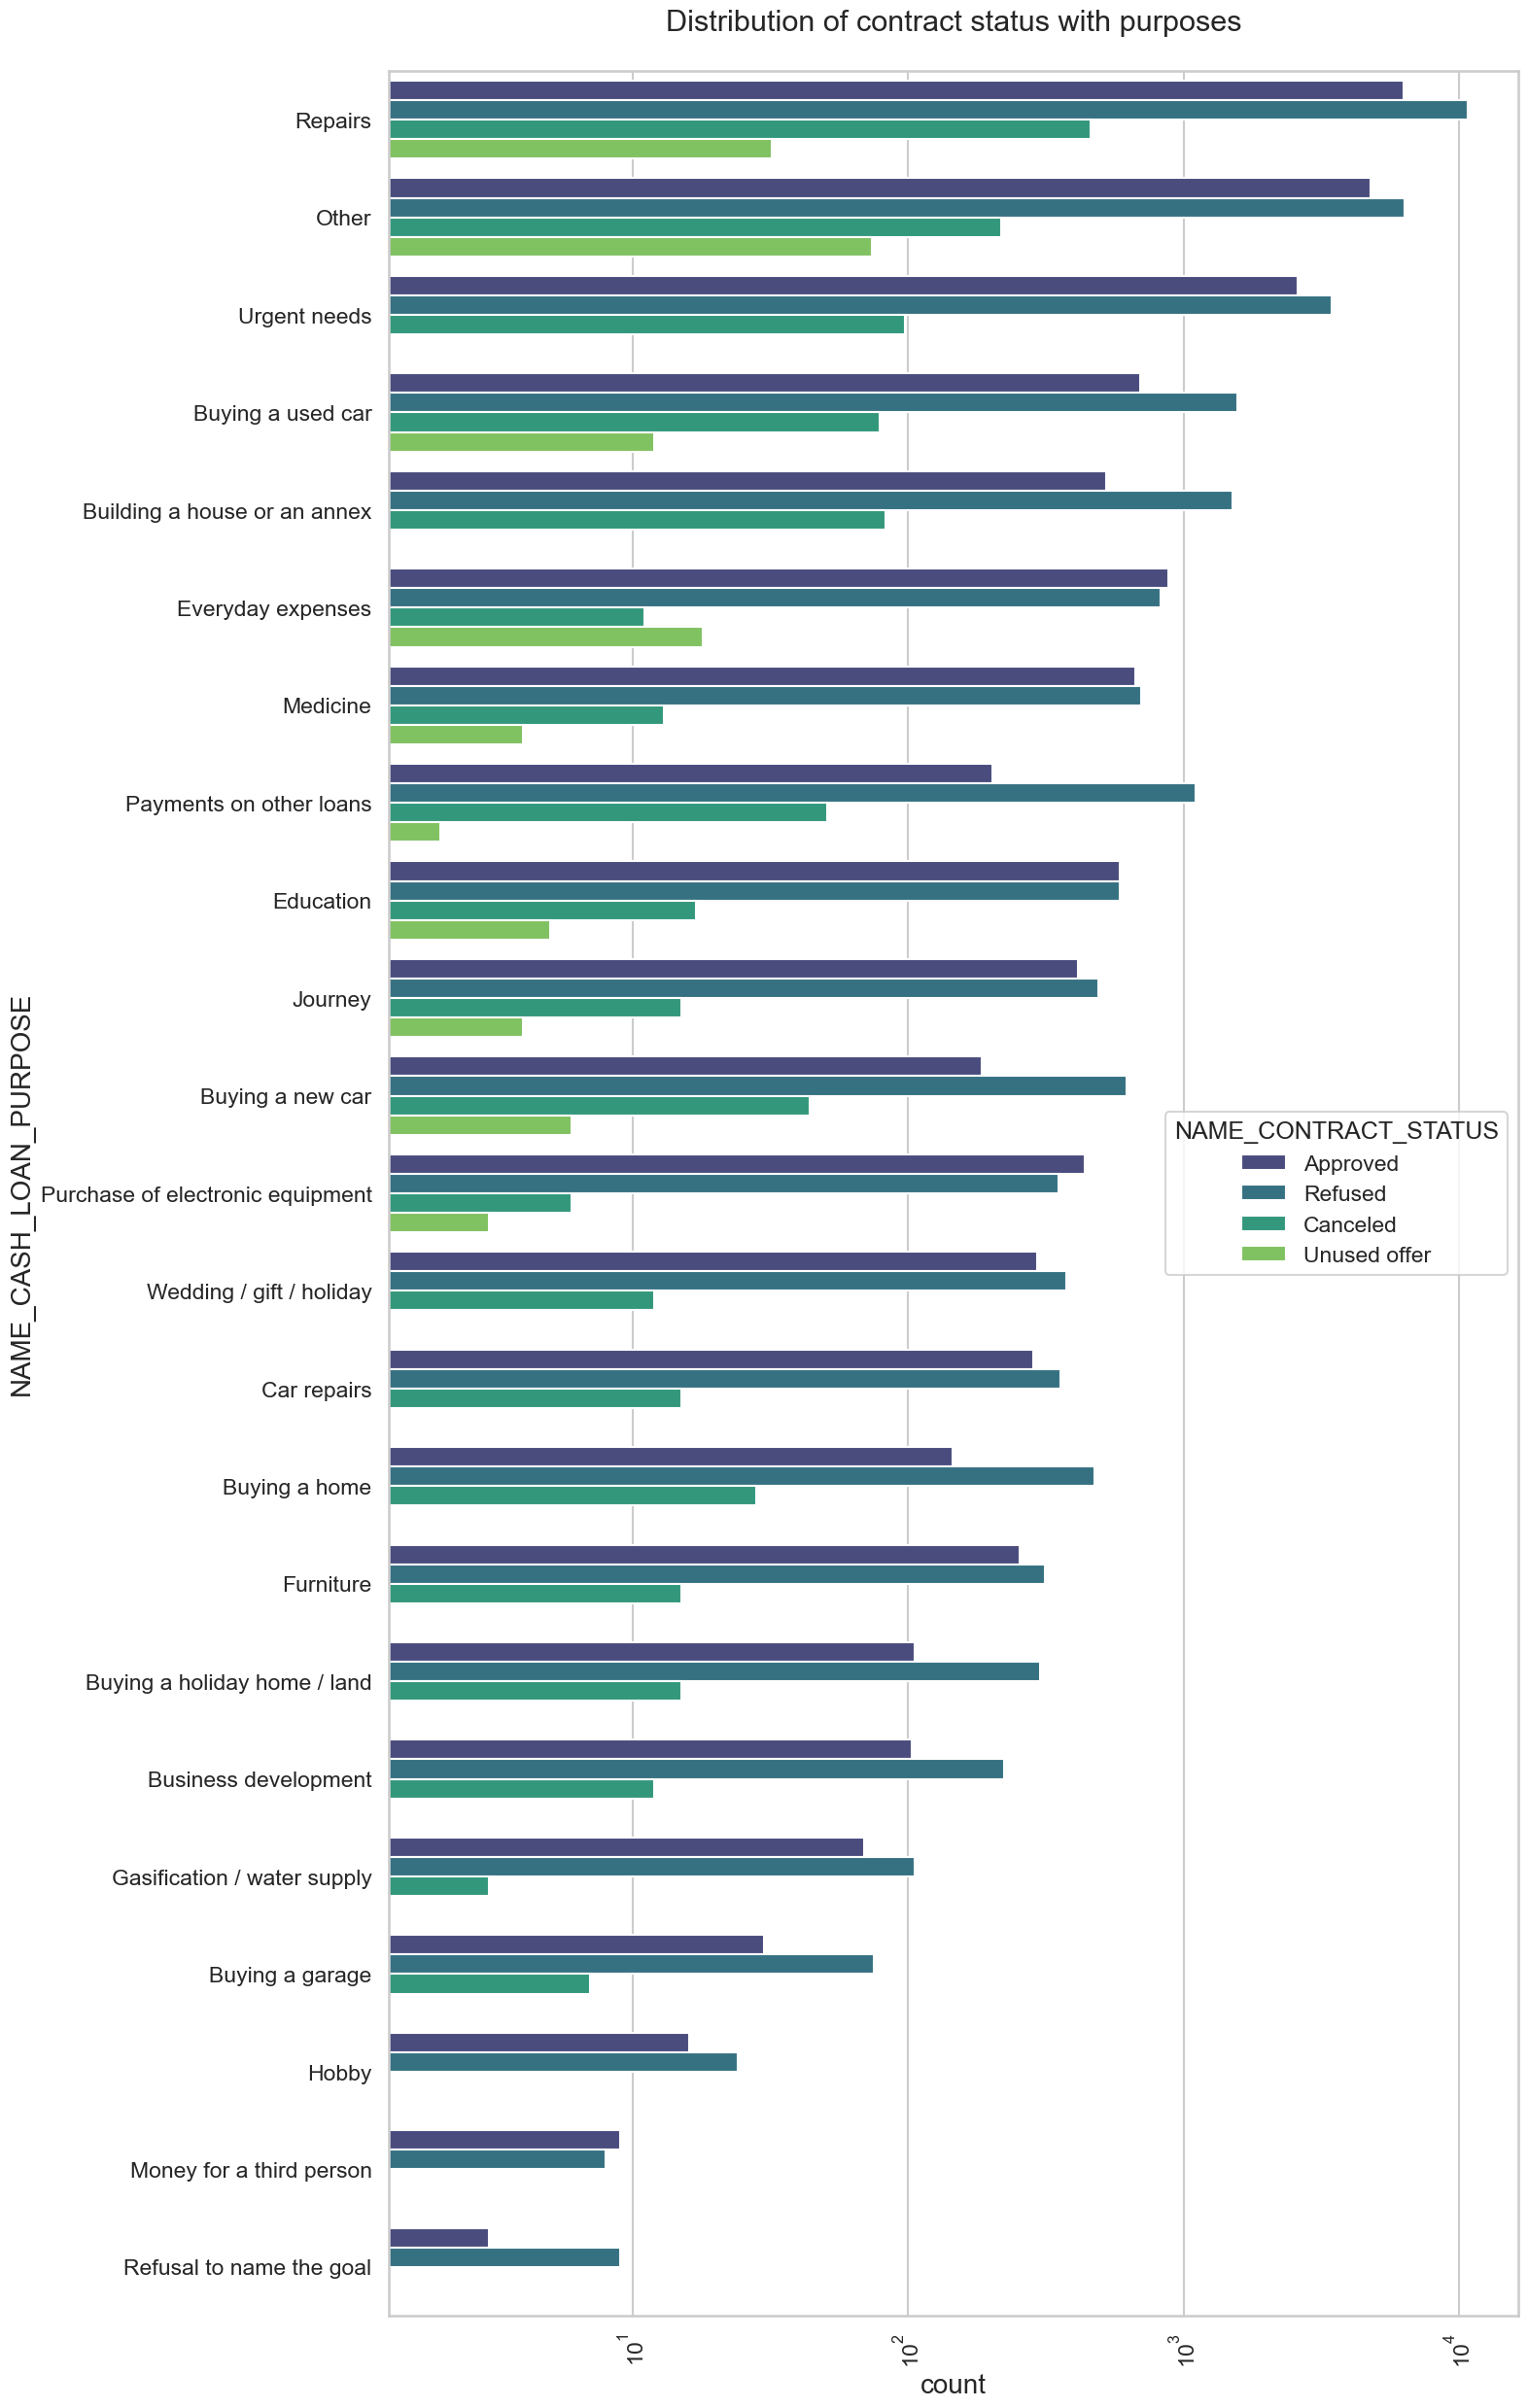

In [55]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='viridis') 

**Conclusions that can be drawn from the above plot**
- The majority of loan denials were for "repairs" in nature.
- We have an equal amount of approvals and rejections for educational purposes.
- Purchases of new cars and other loans are being rejected much more frequently than they are approved.

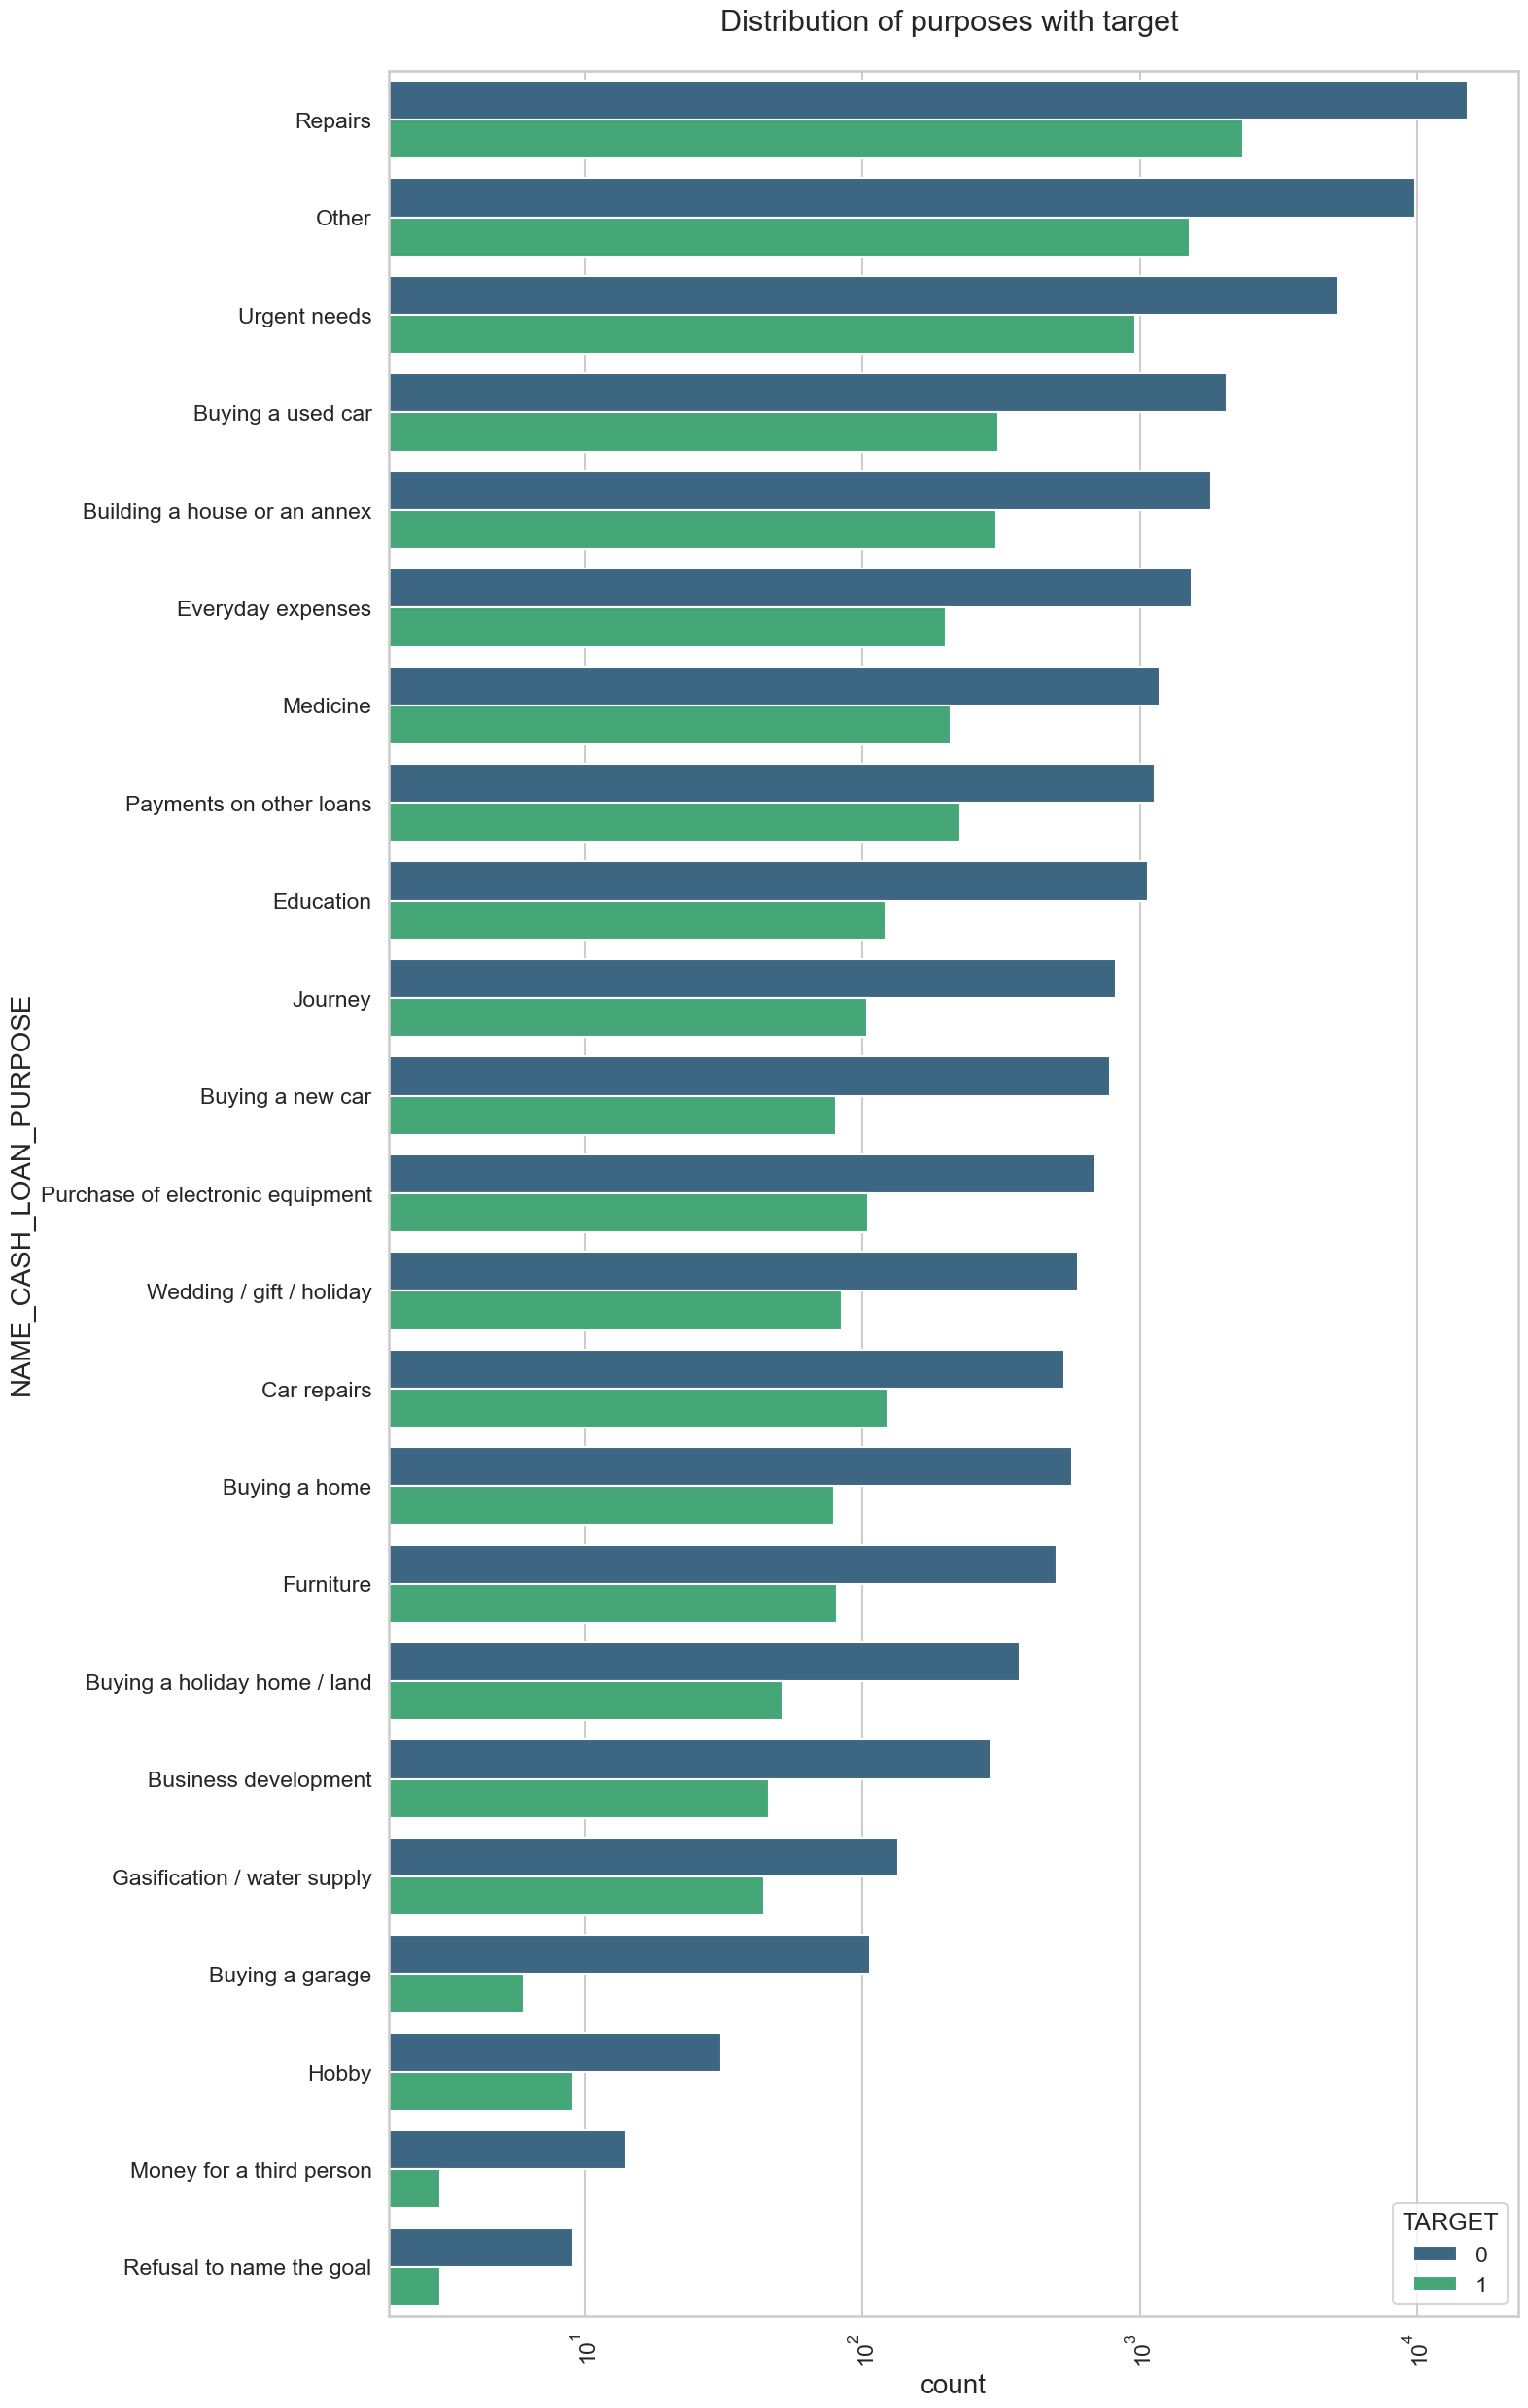

In [56]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_data1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='viridis') 

**Conclusions that can be drawn from the above plot**
- Loan purposes including "Repairs" have more difficulty being paid on schedule.
- The cost of a loan is rarely significantly higher than when one is struggling. These are "buying a garage," "buying a new automobile," "buying land," "business development," and "education."

**So, we can concentrate on these goals for which the client is experiencing just minor payment issues.**

#### Performing Bivariate analysis

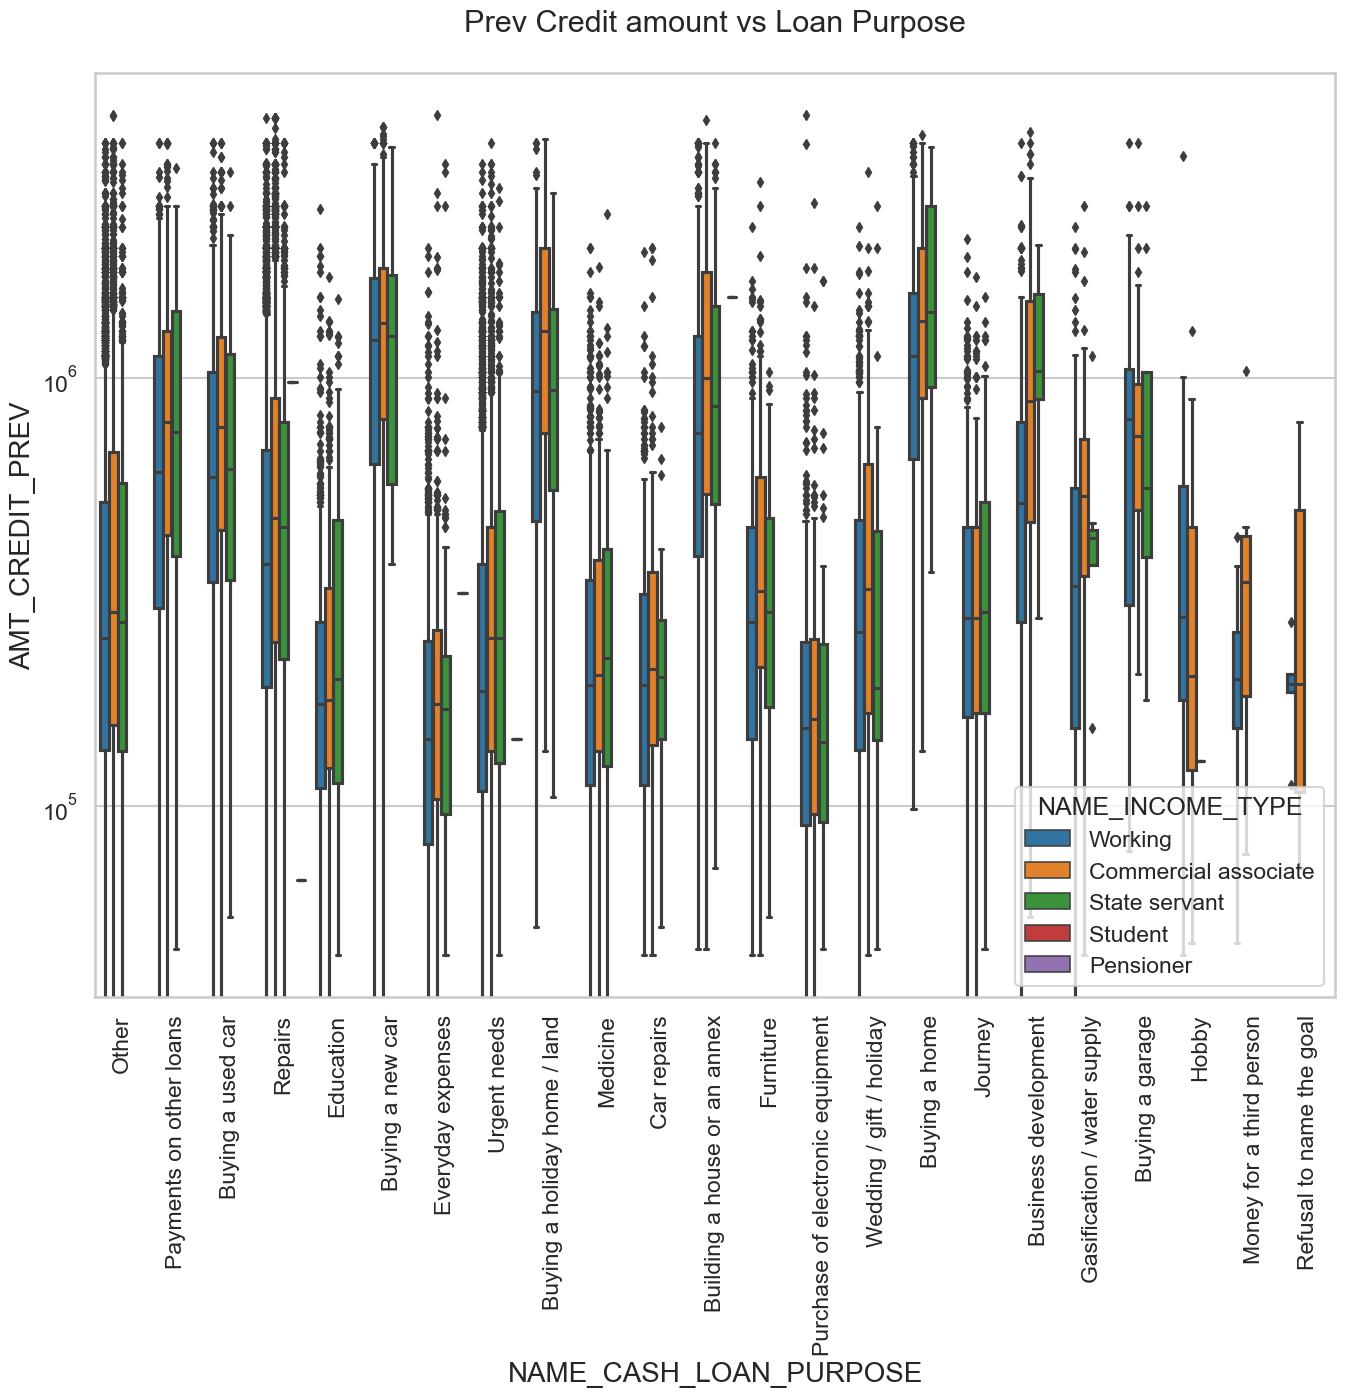

In [57]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_data1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

**Conclusions that can be drawn from the above plot**
- For loan objectives such as "buying a home," "buying a land," "buying a new car," and "building a house," the credit amount is larger.
- State employees' income types receive a substantial amount of credit.
- Less credits are requested when money is needed for a hobby or third party.

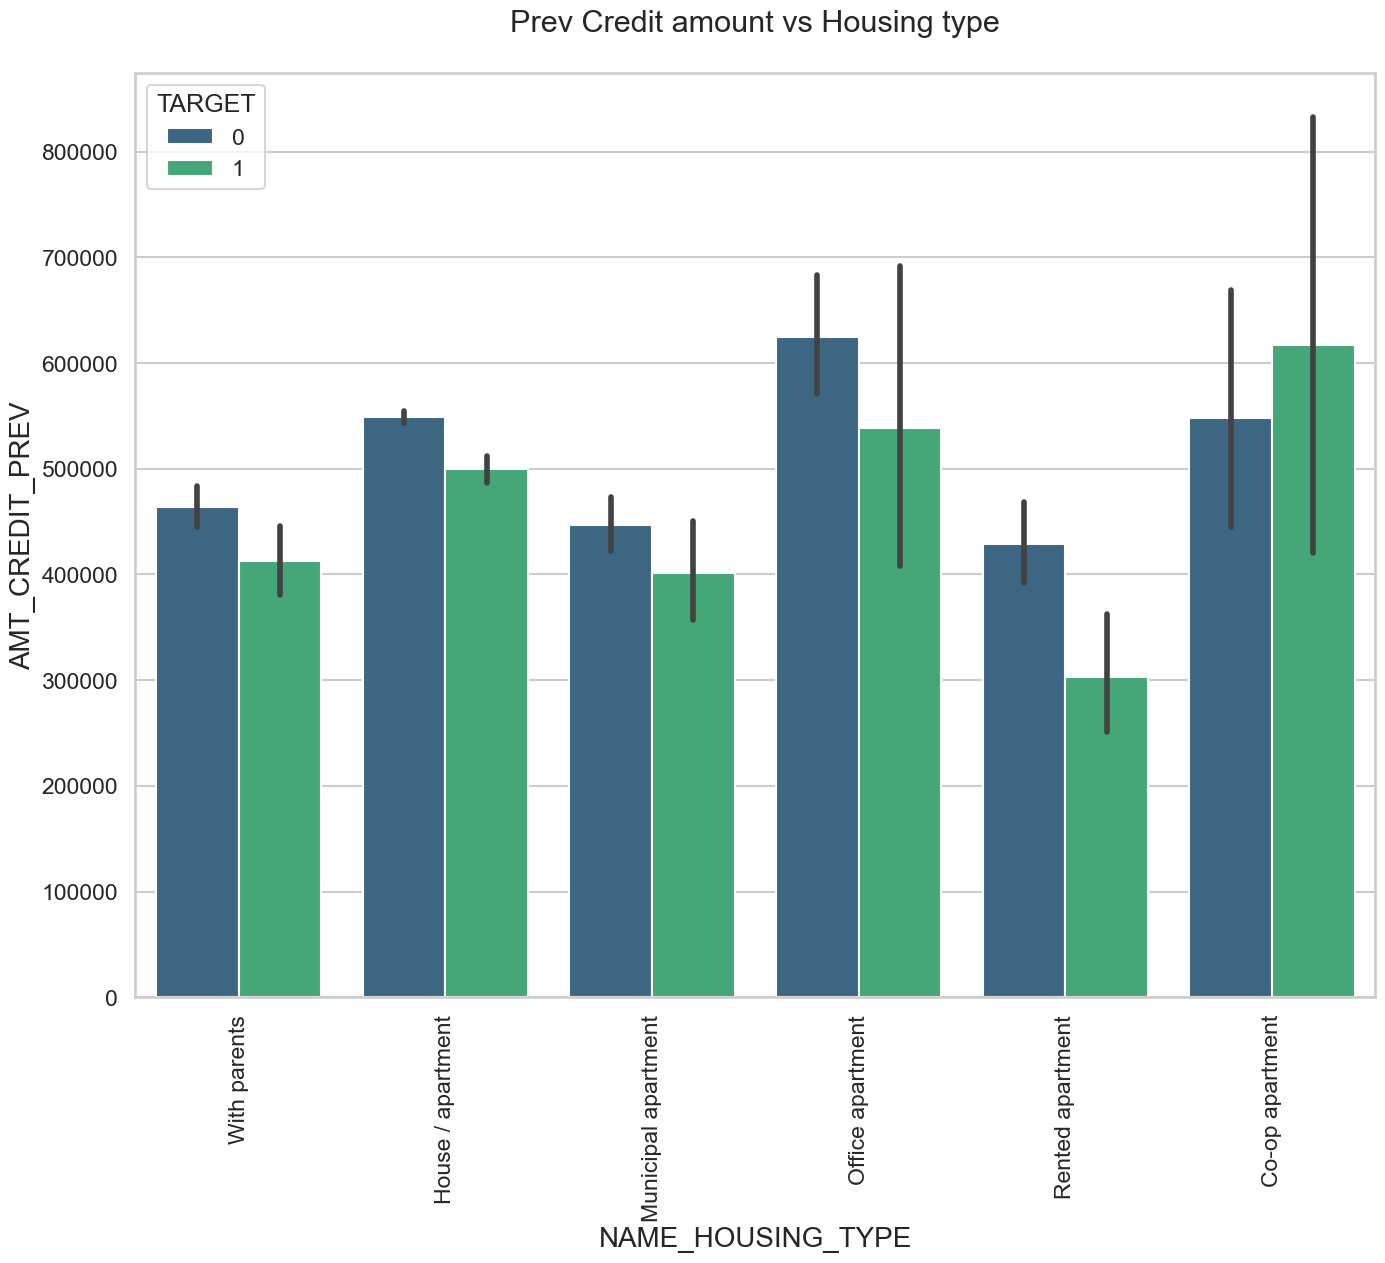

In [58]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_data1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE', palette = 'viridis')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here, the office apartment has a higher credit of target 0 while the co-op apartment has a higher credit of target 1. We can therefore draw the conclusion that a bank should refrain from lending to the co-op flat housing type because of their payment issues. For successful payments, the bank can concentrate mostly on dwelling types such as those with parents, houses, apartments, or municipal apartments.

### CONCLUSIONS

1. For effective payments, banks should place more of an **emphasis on** contract types such as **student, pensioner,** and **businessman** with housing types **other than co-op apartments**.


2. Because there are the most failed payments for the income category **Working** banks should pay less attention to it.


3. The loan objective **Repair** also has a larger percentage of **late payments** that are **unsuccessful**.


4. Target as many clients who fall under the housing category **With Parents** as they experience the **hardly any failed payments**.